IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yuxiang ZHANG & Antoine LECOMTE

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [36]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

import math
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import graphviz as gv


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


"Dans le cadre de notre projet de machine learning sur 20newsgroups, nous avons rencontré d'importantes difficultés de performance avec nos classifieurs personnalisés, qui se révélaient trop lents et provoquaient fréquemment des plantages du noyau. Sur les conseils de ChatGPT, nous avons opté pour une série de bibliothèques Python optimisées : scipy.sparse pour la gestion efficace des matrices creuses, plusieurs classifieurs de scikit-learn comme KNeighborsClassifier et DecisionTreeClassifier, ainsi que des outils de vectorisation de texte (CountVectorizer) et de réduction de dimension (PCA). Nous avons également intégré des métriques d'évaluation complètes (accuracy_score, confusion_matrix) et des méthodes de validation croisée pour éviter le surapprentissage. Ces solutions nous ont permis de résoudre nos problèmes initiaux tout en optimisant significativement les performances de notre système, notamment grâce aux implémentations optimisées de scikit-learn pour le traitement multiclasse et à la gestion mémoire efficace des structures de données creuses."

## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [37]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

messages  target
0      \n\nI am sure some bashers of Pens fans are pr...      10
1      My brother is in the market for a high-perform...       3
2      \n\n\n\n\tFinally you said what you dream abou...      17
3      \nThink!\n\nIt's the SCSI card doing the DMA t...       3
4      1)    I have an old Jasmine drive which I cann...       4
...                                                  ...     ...
18841  DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...      13
18842  \nNot in isolated ground recepticles (usually ...      12
18843  I just installed a DX2-66 CPU in a clone mothe...       3
18844  \nWouldn't this require a hyper-sphere.  In 3-...       1
18845  After a tip from Gary Crum (crum@fcom.cc.utah....       7

[18846 rows x 2 columns]

### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [38]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

stopword
0             a
1         about
2         above
3         after
4         again
..          ...
193      you're
194       yours
195    yourself
196  yourselves
197      you've

[198 rows x 1 columns]

In [39]:
newsgroups_df_neitoie = newsgroups_df.dropna(subset=['messages'])
stop_words_list = stop_words_df['stopword'].tolist()
newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))
newsgroups_df_neitoie

/var/folders/x0/9jmwqqtj7s13pdfprxbhp6r00000gn/T/ipykernel_47223/959504396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))


messages  target  \
0      \n\nI am sure some bashers of Pens fans are pr...      10   
1      My brother is in the market for a high-perform...       3   
2      \n\n\n\n\tFinally you said what you dream abou...      17   
3      \nThink!\n\nIt's the SCSI card doing the DMA t...       3   
4      1)    I have an old Jasmine drive which I cann...       4   
...                                                  ...     ...   
18841  DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...      13   
18842  \nNot in isolated ground recepticles (usually ...      12   
18843  I just installed a DX2-66 CPU in a clone mothe...       3   
18844  \nWouldn't this require a hyper-sphere.  In 3-...       1   
18845  After a tip from Gary Crum (crum@fcom.cc.utah....       7   

                                                les_mots  
0      [sure, bashers, pens, fans, pretty, confused, ...  
1      [brother, market, high, performance, video, ca...  
2      [finally, said, dream, mediterranean, new, are...  
3      [think, scsi, card, dma, transfers, disks, scs...  
4      [old, jasmine, drive, cannot, use, new, system...  
...                                                  ...  
18841  [dn, nyeda, cnsvax, uwec, edu, david, nye, dn,...  
18842  [isolated, ground, recepticles, usually, unusu...  
18843  [installed, cpu, clone, motherboard, tried, mo...  
18844  [require, hyper, sphere, space, points, specif...  
18845  [tip, gary, crum, crum, fcom, cc, utah, edu, g...  

[18466 rows x 3 columns]

In [40]:
index_mots = sorted(set(word for mots in newsgroups_df_neitoie['les_mots'] for word in mots))

print("Nombre de mots trouvés: ", len(index_mots))
print("Les 10 premiers :", index_mots[0:10]) 

# pour contrôler:
for i in range(30,len(index_mots),100):
    print("\ten position ",i," --> ", index_mots[i])


Nombre de mots trouvés:  90850
Les 10 premiers : ["''a", "''achzq", "''afduqy", "''afg", "''ai", "''ai''q", "''al", "''bpl", "''bs", "''c"]
	en position  30  -->  'afdzqvg'al
	en position  130  -->  'i'
	en position  230  -->  'qp
	en position  330  -->  'wx
	en position  430  -->  aarskog
	en position  530  -->  abhorrence
	en position  630  -->  abridgement
	en position  730  -->  acadamy
	en position  830  -->  accom
	en position  930  -->  accusers
	en position  1030  -->  acknowledgment
	en position  1130  -->  activitiests
	en position  1230  -->  adda
	en position  1330  -->  aditives
	en position  1430  -->  ado
	en position  1530  -->  adventists
	en position  1630  -->  aerodynamics
	en position  1730  -->  afflicting
	en position  1830  -->  agabus
	en position  1930  -->  agonies
	en position  2030  -->  ahmad
	en position  2130  -->  aire
	en position  2230  -->  ajteel
	en position  2330  -->  alarm
	en position  2430  -->  aleuts
	en position  2530  -->  alive
	en positi

In [41]:
# Importation des bibliothèques nécessaires
from collections import Counter  # Pour compter les occurrences de mots
import nltk  # Natural Language Toolkit
from nltk.corpus import words  # Vocabulaire anglais de NLTK

# Téléchargement du vocabulaire anglais depuis NLTK
nltk.download('words')

# Création d'un ensemble du vocabulaire anglais pour vérification rapide
english_vocab = set(words.words())

# Extraction de tous les mots du DataFrame (aplatissement de la liste de listes)
all_words = [word for mots in newsgroups_df_neitoie['les_mots'] for word in mots]

# Comptage des occurrences de chaque mot
word_counts = Counter(all_words)

# Création d'un index de mots filtrés selon plusieurs critères:
index_mots = sorted(set(
    mot for mot in all_words
    if mot[0].isalpha()  # Le mot commence par une lettre
    and mot.isalpha()  # Le mot ne contient que des lettres
    and 3 <= len(mot) <= 20  # Longueur entre 3 et 20 caractères
    and word_counts[mot] >= 5  # Apparaît au moins 5 fois
    and mot.lower() in english_vocab  # Fait partie du vocabulaire anglais
))

# Affichage des statistiques
print("Nombre de mots trouvés: ", len(index_mots))
print("Les 10 premiers :", index_mots[0:10]) 

# Vérification aléatoire de la qualité des résultats
for i in range(30, len(index_mots), 100):  # Par pas de 100 à partir de l'index 30
    print("\ten position ", i, " --> ", index_mots[i])

[nltk_data] Downloading package words to
[nltk_data]     /Users/yuxiangzhang/nltk_data...
[nltk_data]   Package words is already up-to-date!


Nombre de mots trouvés:  11928
Les 10 premiers : ['abandon', 'abandoned', 'abbey', 'abbreviation', 'abdomen', 'abdominal', 'abduct', 'aberrant', 'aberration', 'abhor']
	en position  30  -->  absolute
	en position  130  -->  acupuncture
	en position  230  -->  aftermath
	en position  330  -->  alpine
	en position  430  -->  angular
	en position  530  -->  applicant
	en position  630  -->  ashamed
	en position  730  -->  attractive
	en position  830  -->  bacterium
	en position  930  -->  batting
	en position  1030  -->  betting
	en position  1130  -->  blink
	en position  1230  -->  bound
	en position  1330  -->  brutal
	en position  1430  -->  cain
	en position  1530  -->  carry
	en position  1630  -->  chalk
	en position  1730  -->  choleric
	en position  1830  -->  click
	en position  1930  -->  collapse
	en position  2030  -->  compatible
	en position  2130  -->  condensed
	en position  2230  -->  conspiracy
	en position  2330  -->  convinced
	en position  2430  -->  coupon
	en posi

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


## Tâches à réaliser

In [42]:
def bag_of_words_sparse_manual(texts_tokenized, vocab, mode="count"):
    """
    :param mode: valeurs possibles : 'count', 'binary', 'freq'
    """
    vocab_index = {word: i for i, word in enumerate(vocab)}

    rows, cols, data = [], [], []

    for row_idx, tokens in enumerate(texts_tokenized):
        word_counts = {}
        for word in tokens:
            if word in vocab_index:
                col_idx = vocab_index[word]
                word_counts[col_idx] = word_counts.get(col_idx, 0) + 1

        total_words = sum(word_counts.values())

        for col_idx, count in word_counts.items():
            rows.append(row_idx)
            cols.append(col_idx)

            if mode == "count":
                value = count
            elif mode == "binary":
                value = 1
            elif mode == "freq":
                value = count / total_words
            else:
                raise ValueError("Mode non supporté : choisissez parmi 'count', 'binary', 'freq'")

            data.append(value)

    n_rows = len(texts_tokenized)
    n_cols = len(vocab)
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols), dtype=float)
    return sparse_matrix, vocab_index

In [43]:
def bag_of_words_tfidf_manual(textes_tokenisés, vocabulaire):
    """
    :param textes_tokenisés: Liste de listes de mots (tokens)
    :param vocabulaire: liste des mots du vocabulaire
    :return: matrice creuse TF-IDF (csr_matrix), dictionnaire {mot: index}
    """
    vocab_index = {mot: i for i, mot in enumerate(vocabulaire)}
    N_docs = len(textes_tokenisés)  # Nombre de documents
    
    # 1. Calcul de la DF (Document Frequency)
    df_counts = np.zeros(len(vocabulaire))
    for tokens in textes_tokenisés:
        mots_uniques = set(tokens)
        for mot in mots_uniques:
            if mot in vocab_index:
                df_counts[vocab_index[mot]] += 1
    
    # Éviter la division par 0
    df_counts[df_counts == 0] = 1

    # 2. Construction de la matrice creuse TF-IDF
    lignes, colonnes, données = [], [], []

    for doc_idx, tokens in enumerate(textes_tokenisés):
        tf_counts = {}
        for mot in tokens:
            if mot in vocab_index:
                idx = vocab_index[mot]
                tf_counts[idx] = tf_counts.get(idx, 0) + 1

        total_mots = sum(tf_counts.values())

        for idx, tf in tf_counts.items():
            tf_val = tf / total_mots
            idf_val = math.log(N_docs / df_counts[idx])
            tfidf = tf_val * idf_val

            lignes.append(doc_idx)
            colonnes.append(idx)
            données.append(tfidf)

    mat = csr_matrix((données, (lignes, colonnes)), shape=(N_docs, len(vocabulaire)))
    return mat, vocab_index


In [44]:
# Appel de la fonction pour générer la matrice BoW
X_sparse, vec = bag_of_words_sparse_manual(newsgroups_df_neitoie['les_mots'], index_mots)

# Vérification de la forme de la matrice
print(X_sparse.shape)
print(type(X_sparse))

# Conversion en DataFrame pour affichage
df_bow = pd.DataFrame(X_sparse.toarray(), columns=index_mots)
df_bow

(18466, 11928)
<class 'scipy.sparse._csr.csr_matrix'>


abandon  abandoned  abbey  abbreviation  abdomen  abdominal  abduct  \
0          0.0        0.0    0.0           0.0      0.0        0.0     0.0   
1          0.0        0.0    0.0           0.0      0.0        0.0     0.0   
2          0.0        0.0    0.0           0.0      0.0        0.0     0.0   
3          0.0        0.0    0.0           0.0      0.0        0.0     0.0   
4          0.0        0.0    0.0           0.0      0.0        0.0     0.0   
...        ...        ...    ...           ...      ...        ...     ...   
18461      0.0        0.0    0.0           0.0      0.0        0.0     0.0   
18462      0.0        0.0    0.0           0.0      0.0        0.0     0.0   
18463      0.0        0.0    0.0           0.0      0.0        0.0     0.0   
18464      0.0        0.0    0.0           0.0      0.0        0.0     0.0   
18465      0.0        0.0    0.0           0.0      0.0        0.0     0.0   

       aberrant  aberration  abhor  ...  zeta  zinc  zip  zipper  zippy  \
0           0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
1           0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
2           0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
3           0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
4           0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
...         ...         ...    ...  ...   ...   ...  ...     ...    ...   
18461       0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
18462       0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
18463       0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
18464       0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   
18465       0.0         0.0    0.0  ...   0.0   0.0  0.0     0.0    0.0   

       zodiacal  zone  zoo  zooid  zoom  
0           0.0   0.0  0.0    0.0   0.0  
1           0.0   0.0  0.0    0.0   0.0  
2           0.0   0.0  0.0    0.0   0.0  
3           0.0   0.0  0.0    0.0   0.0  
4           0.0   0.0  0.0    0.0   0.0  
...         ...   ...  ...    ...   ...  
18461       0.0   0.0  0.0    0.0   0.0  
18462       0.0   0.0  0.0    0.0   0.0  
18463       0.0   0.0  0.0    0.0   0.0  
18464       0.0   0.0  0.0    0.0   0.0  
18465       0.0   0.0  0.0    0.0   0.0  

[18466 rows x 11928 columns]

In [45]:
np.random.seed(42)  # Pour reproductibilité

# Pourcentage d'exemples de chaque classe à garder :
taux = 0.1  # 10%

# Déclaration des variables qui seront initialisées dans la boucle :
df_train = pd.DataFrame()  
df_test = pd.DataFrame()

les_targets = newsgroups_df_neitoie['target'].unique()

for l in les_targets:
    nb_total = newsgroups_df_neitoie['target'].value_counts()[l]  # Nombre total d'exemples pour la classe l
    nb_pris = int(nb_total * taux)  # Nombre d'exemples à prendre pour l'entraînement
    print(f"Nombre d'exemples du label {l} pris pour apprendre: {nb_pris}")

    # Récupération des indices des exemples de cette classe
    les_ids = newsgroups_df_neitoie[newsgroups_df_neitoie['target'] == l].index.to_list()
    
    # Mélanger les indices aléatoirement
    np.random.shuffle(les_ids)

    # Séparer les indices pour l'entraînement et le test
    ids_train = les_ids[:nb_pris]  # 10% pour l'entraînement
    ids_test = les_ids[nb_pris:]   # Le reste pour le test

    # Ajouter les données correspondantes aux DataFrames
    df_train = pd.concat([df_train, newsgroups_df_neitoie.loc[ids_train]], ignore_index=True)
    df_test = pd.concat([df_test, newsgroups_df_neitoie.loc[ids_test]], ignore_index=True)

# Résultat :
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 10 pris pour apprendre: 98
Nombre d'exemples du label 3 pris pour apprendre: 97
Nombre d'exemples du label 17 pris pour apprendre: 92
Nombre d'exemples du label 4 pris pour apprendre: 93
Nombre d'exemples du label 12 pris pour apprendre: 96
Nombre d'exemples du label 19 pris pour apprendre: 60
Nombre d'exemples du label 11 pris pour apprendre: 96
Nombre d'exemples du label 13 pris pour apprendre: 96
Nombre d'exemples du label 0 pris pour apprendre: 78
Nombre d'exemples du label 8 pris pour apprendre: 97
Nombre d'exemples du label 7 pris pour apprendre: 94
Nombre d'exemples du label 5 pris pour apprendre: 98
Nombre d'exemples du label 1 pris pour apprendre: 95
Nombre d'exemples du label 14 pris pour apprendre: 96
Nombre d'exemples du label 16 pris pour apprendre: 89
Nombre d'exemples du label 6 pris pour apprendre: 96
Nombre d'exemples du label 9 pris pour apprendre: 96
Nombre d'exemples du label 18 pris pour apprendre: 76
Nombre d'exemples du label 2 pris pou

# Classifier Perceptron

Temps total d'entraînement : 1.2524452209472656 secondes


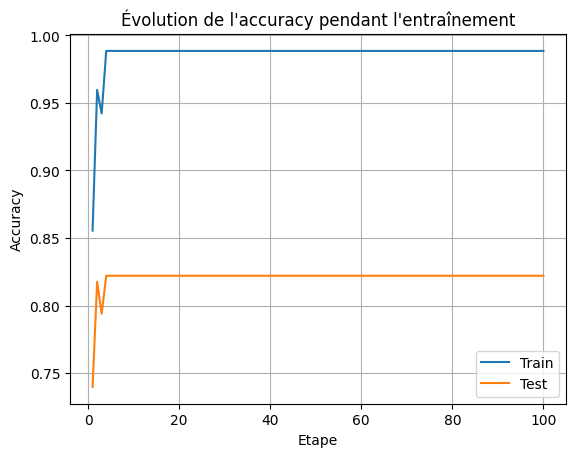

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8220663265306123
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


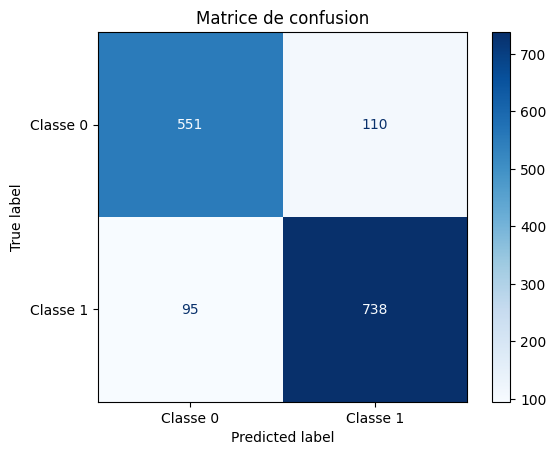

In [46]:
# ======================================================
# Classification binaire avec Perceptron - Version 1
# ======================================================
# Cette version utilise une méthode de conversion directe des données
# via la fonction df2array (non détaillée ici)

# Sélection des deux classes à classifier
classe1 = 0
classe2 = 1

# Filtrage des données d'entraînement et de test
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en format binaire (-1/+1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Préparation des données d'entraînement et de test
X_train_bin = ut.df2array(df_binaire, index_mots)  # Conversion des features
y_train_bin = df_binaire['target_bin'].values      # Labels d'entraînement

X_test_bin = ut.df2array(df_test_bin, index_mots)  # Conversion des features
y_test_bin = df_test_bin['target_bin'].values      # Labels de test

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptron(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

# Listes pour stocker les performances
train_acc = []  # Précision sur le train set
test_acc = []   # Précision sur le test set

# Boucle d'entraînement
N = 100  # Nombre d'itérations

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train_bin, y_train_bin)
    
    # Prédictions et calcul de l'accuracy
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    # Enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())
    
end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1),train_acc, label='Train')
plt.plot(range(1,N+1),test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.title("Évolution de l'accuracy pendant l'entraînement")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6399490833282471 secondes


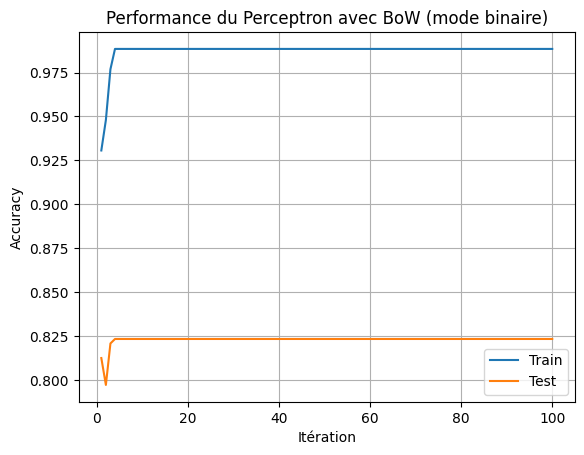

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8233418367346939
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


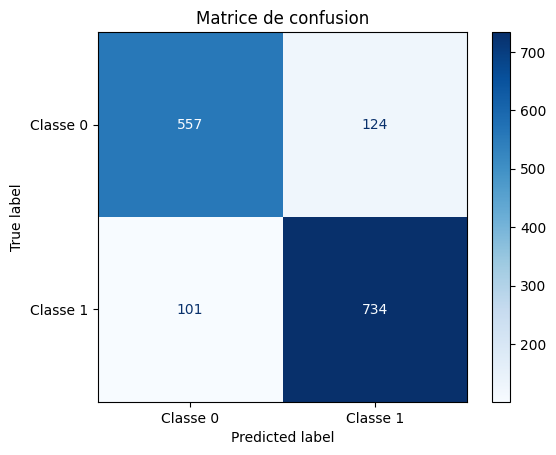

In [47]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec Perceptron - Version 2
# ======================================================
# Cette version utilise explicitement un modèle Bag-of-Words (BoW)
# pour la vectorisation des textes

# Sélection des classes (identique à la version 1)
classe1 = 0
classe2 = 1

# Filtrage des données (identique à la version 1)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels (identique à la version 1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# Entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des performances

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Performance du Perceptron avec BoW (mode binaire)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6322243213653564 secondes


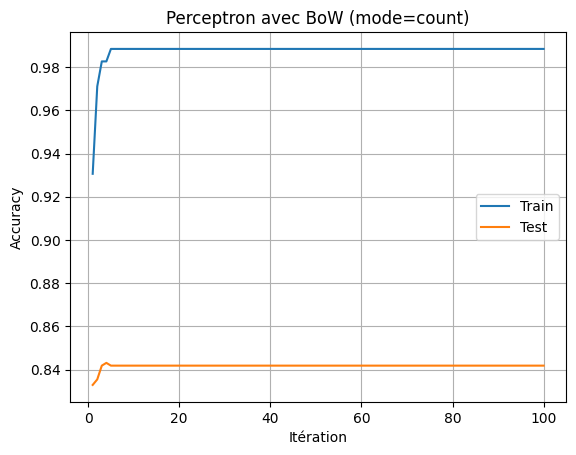

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8418367346938775
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(0.9705882352941176), np.float64(0.9705882352941176), np.float64(0.9705882352941176)]
Taux moyen de bonne classification : 0.9765
Écart-type : 0.0118


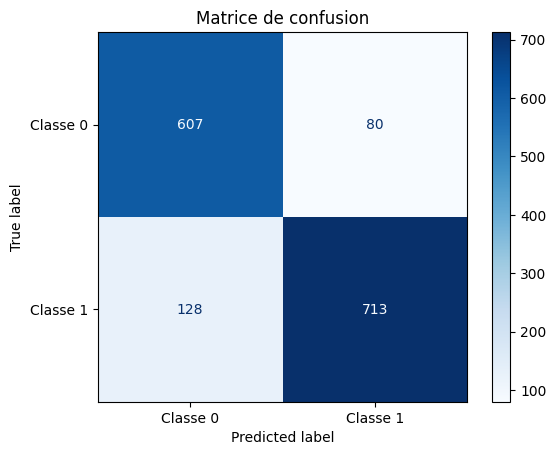

In [48]:
# =================================================================
# Classification binaire avec Comptage de mots (Bag-of-Words count) avec Perceptron - Version 3
# =================================================================
# Cette version utilise la fréquence brute des mots comme caractéristiques

# Définition des classes à classifier
classe1 = 0
classe2 = 1

# Préparation des données - Filtrage des classes sélectionnées
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Transformation des labels en format binaire (-1 pour classe1, +1 pour classe2)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode comptage
# Le mode "count" enregistre le nombre d'occurrences de chaque mot
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron avec le nombre de caractéristiques et taux d'apprentissage
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# Boucle d'entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des précisions

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Phase d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des précisions
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6305558681488037 secondes


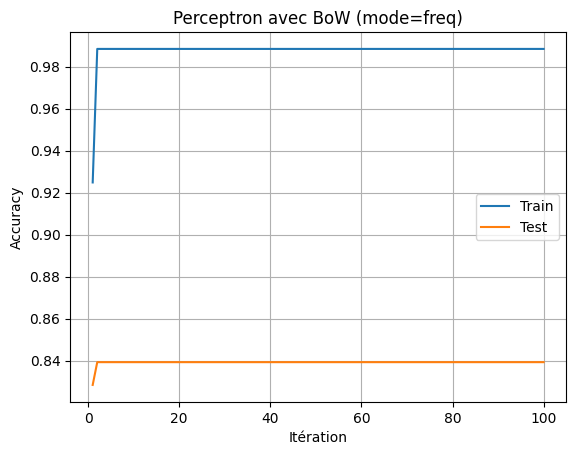

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8392857142857143
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7647
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8235
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7647058823529411), np.float64(0.7941176470588235), np.float64(0.8235294117647058)]
Taux moyen de bonne classification : 0.8176
Écart-type : 0.0343


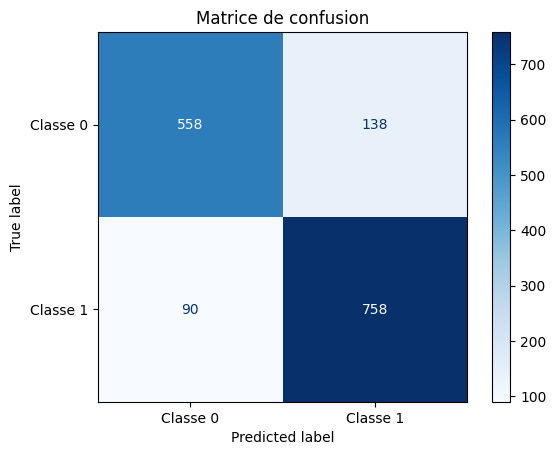

In [49]:
# =================================================================
# Classification binaire avec Fréquence relative (Bag-of-Words freq) avec Perceptron - Version 4
# =================================================================
# Cette version utilise la fréquence relative des mots comme caractéristiques

classe1 = 0
classe2 = 1

df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode fréquence
# Le mode "freq" utilise la fréquence relative (occurrences normalisées par document)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6359288692474365 secondes


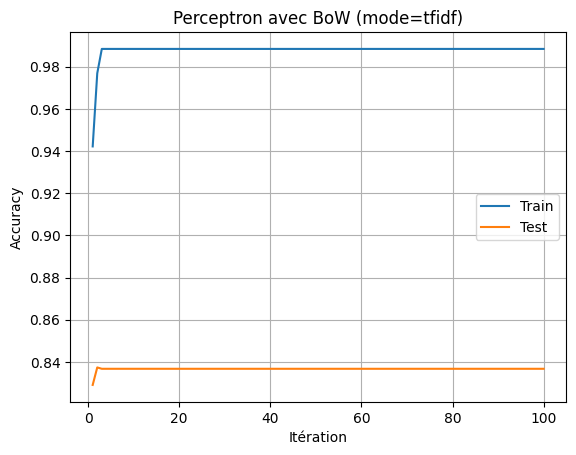

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8367346938775511
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7647
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8235
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9118
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.7941176470588235), np.float64(0.7647058823529411), np.float64(0.8235294117647058), np.float64(0.9117647058823529)]
Taux moyen de bonne classification : 0.8353
Écart-type : 0.0546


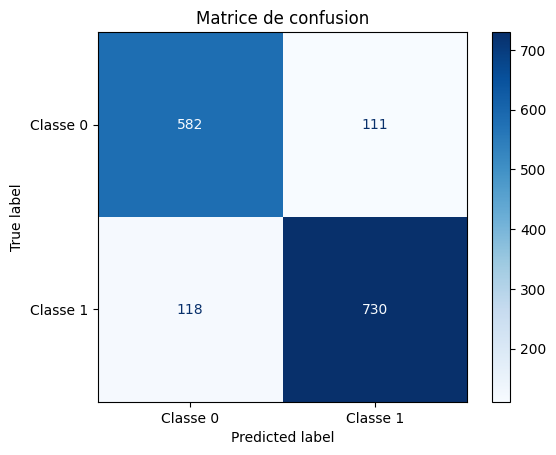

In [50]:
# =================================================================
# Classification binaire avec TF-IDF avec Perceptron - Version 5
# =================================================================
# Cette version utilise le score TF-IDF comme caractéristiques

classe1 = 0
classe2 = 1

df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle TF-IDF
# TF-IDF pondère les mots par leur importance dans le document et le corpus
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) : 1.2713229656219482 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4583


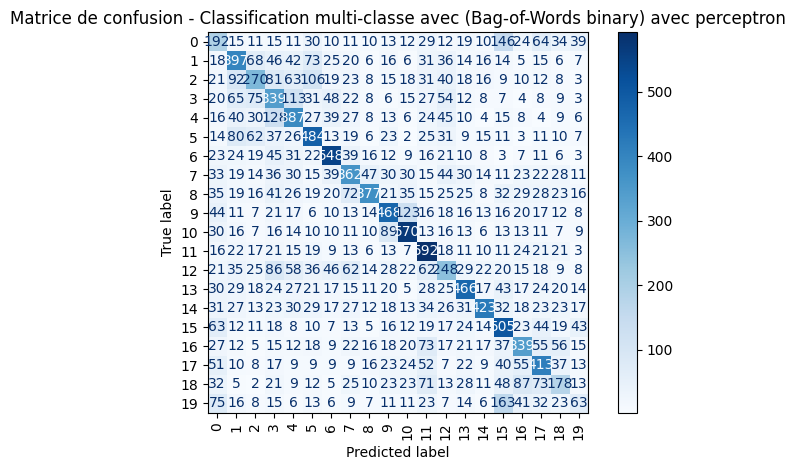

Itération 0: Accuracy = 0.4556
Itération 1: Accuracy = 0.4222
Itération 2: Accuracy = 0.4472
Itération 3: Accuracy = 0.4000
Itération 4: Accuracy = 0.4583
Taux moyen : 0.4367, Écart-type : 0.0223


In [51]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec perceptron - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "freq", "tfidf"(fonction bag_of_words_tfidf_manual)
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words binary) avec perceptron")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) : 1.647778034210205 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4396


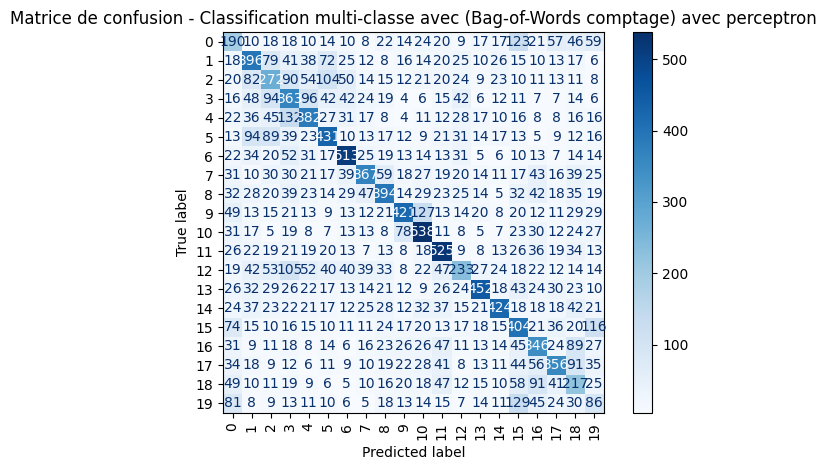

Itération 0: Accuracy = 0.4306
Itération 1: Accuracy = 0.4167
Itération 2: Accuracy = 0.4028
Itération 3: Accuracy = 0.4111
Itération 4: Accuracy = 0.4083
Taux moyen : 0.4139, Écart-type : 0.0095


In [52]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words comptage) avec perceptron - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"   # "binary", "count", "freq", "tfidf"(fonction bag_of_words_tfidf_manual)
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words comptage) avec perceptron")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")


Temps d'entraînement (multi-classe) : 1.660815954208374 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4317


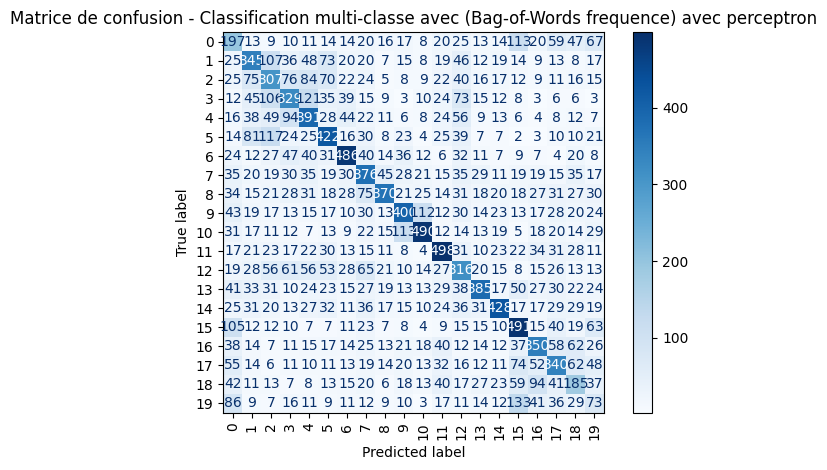

Itération 0: Accuracy = 0.4194
Itération 1: Accuracy = 0.3833
Itération 2: Accuracy = 0.3750
Itération 3: Accuracy = 0.4000
Itération 4: Accuracy = 0.4222
Taux moyen : 0.4000, Écart-type : 0.0188


In [53]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words frequence) avec perceptron - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"   # "binary", "count", "freq", "tfidf"(fonction bag_of_words_tfidf_manual)
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words frequence) avec perceptron")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")


Temps d'entraînement (multi-classe) : 1.1476762294769287 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4479


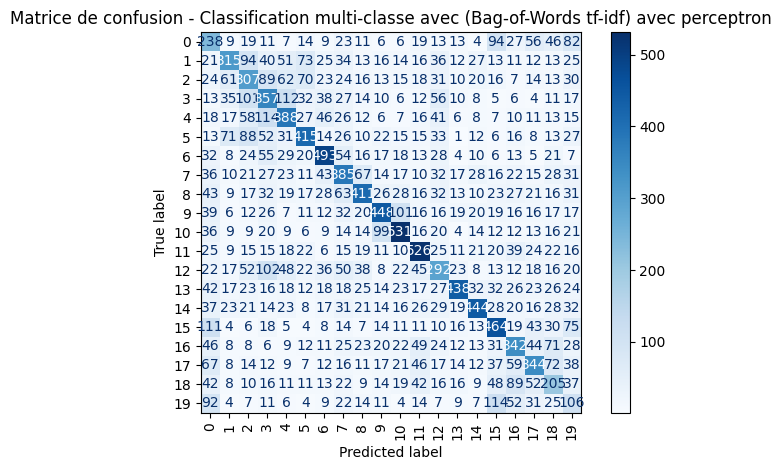

Itération 0: Accuracy = 0.4333
Itération 1: Accuracy = 0.4056
Itération 2: Accuracy = 0.3750
Itération 3: Accuracy = 0.4222
Itération 4: Accuracy = 0.4000
Taux moyen : 0.4072, Écart-type : 0.0200


In [54]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words tf-idf) avec perceptron - Version 4
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words tf-idf) avec perceptron")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")


# Classifier PerceptronBiais

Temps total d'entraînement : 1.2888462543487549 secondes


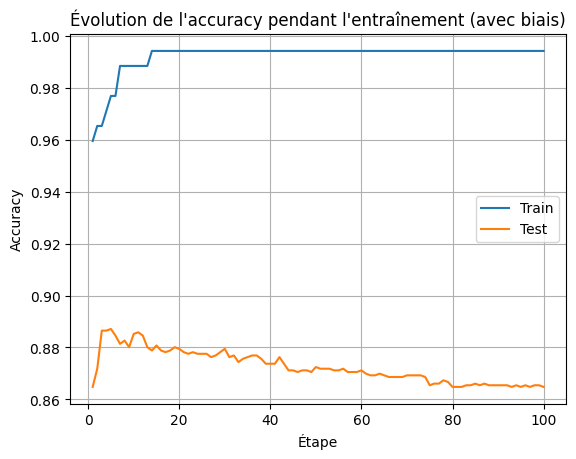

Accuracy finale (train): 0.9942196531791907
Accuracy finale (test) : 0.8647959183673469
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


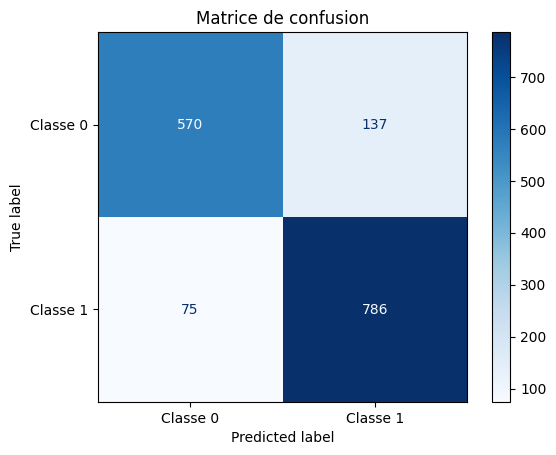

In [55]:
# ======================================================
# Classification binaire avec PerceptronBiais - Version 1
# ======================================================

# Sélection des deux classes à classifier
classe1 = 0
classe2 = 1

# Filtrage des données d'entraînement et de test
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en format binaire (-1/+1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Préparation des données d'entraînement et de test
X_train_bin = ut.df2array(df_binaire, index_mots)  # Conversion des features
y_train_bin = df_binaire['target_bin'].values      # Labels d'entraînement

X_test_bin = ut.df2array(df_test_bin, index_mots)  # Conversion des features
y_test_bin = df_test_bin['target_bin'].values      # Labels de test

# Initialisation du perceptron AVEC BIAIS
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

# Listes pour stocker les performances
train_acc = []  # Précision sur le train set
test_acc = []   # Précision sur le test set

# Boucle d'entraînement
N = 100  # Nombre d'itérations

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train_bin, y_train_bin)
    
    # Prédictions et calcul de l'accuracy
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    # Enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1, N+1), train_acc, label='Train')
plt.plot(range(1, N+1), test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Étape")
plt.title("Évolution de l'accuracy pendant l'entraînement (avec biais)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6842498779296875 secondes


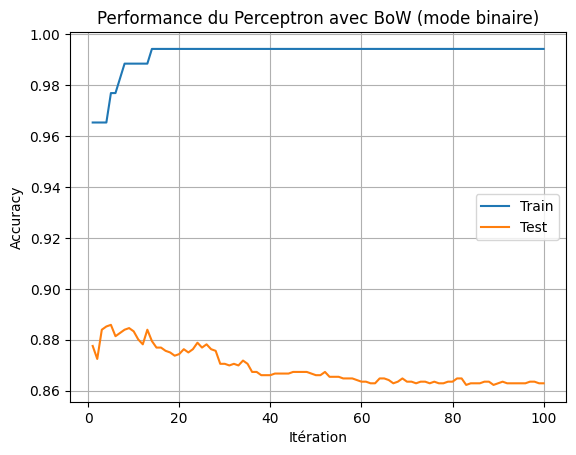

Accuracy finale (train): 0.9942196531791907
Accuracy finale (test) : 0.8628826530612245
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


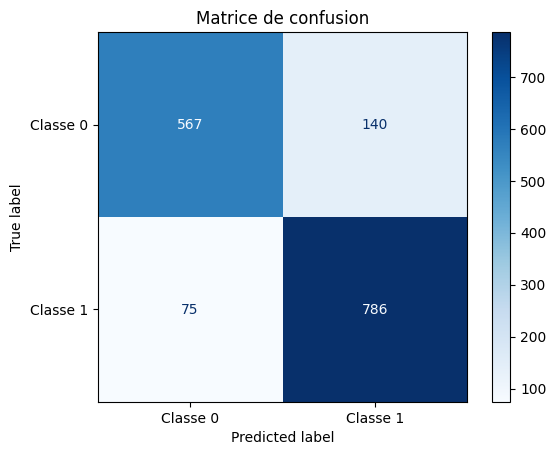

In [56]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec PerceptronBiais - Version 2
# ======================================================
# Cette version utilise explicitement un modèle Bag-of-Words (BoW)
# pour la vectorisation des textes

# Sélection des classes (identique à la version 1)
classe1 = 0
classe2 = 1

# Filtrage des données (identique à la version 1)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels (identique à la version 1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

# Entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des performances

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Performance du Perceptron avec BoW (mode binaire)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.7144351005554199 secondes


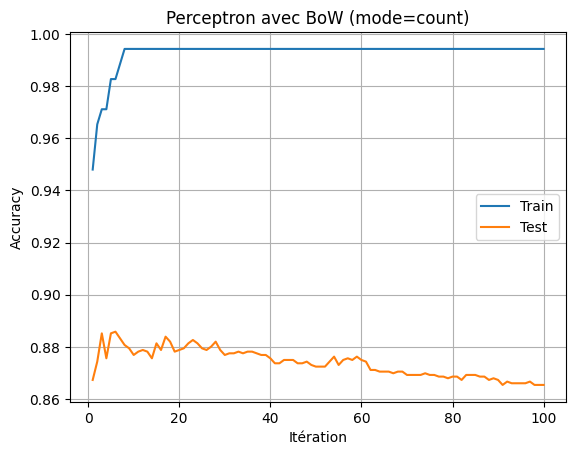

Accuracy finale (train): 0.9942196531791907
Accuracy finale (test) : 0.8654336734693877
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


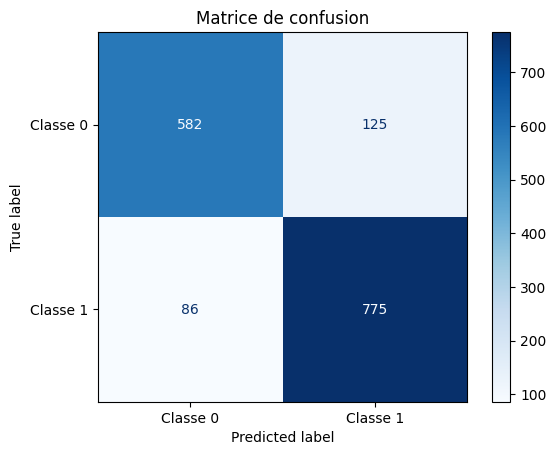

In [57]:
# =================================================================
# Classification binaire avec Comptage de mots (Bag-of-Words count) avec PerceptronBiais - Version 3
# =================================================================
# Cette version utilise la fréquence brute des mots comme caractéristiques

# Définition des classes à classifier
classe1 = 0
classe2 = 1

# Préparation des données - Filtrage des classes sélectionnées
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Transformation des labels en format binaire (-1 pour classe1, +1 pour classe2)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode comptage
# Le mode "count" enregistre le nombre d'occurrences de chaque mot
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron avec le nombre de caractéristiques et taux d'apprentissage
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

# Boucle d'entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des précisions

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Phase d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des précisions
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.7543280124664307 secondes


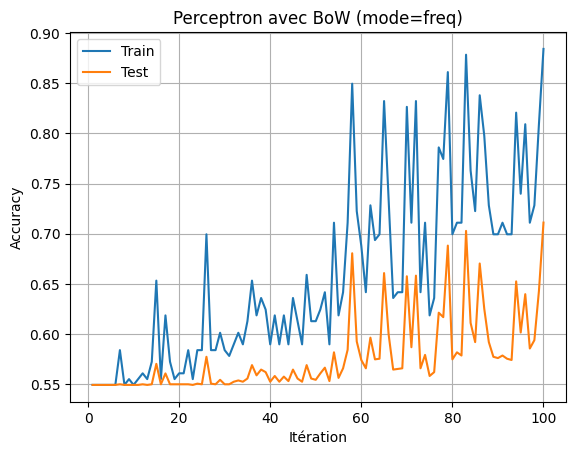

Accuracy finale (train): 0.884393063583815
Accuracy finale (test) : 0.7110969387755102
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.9705882352941176), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9824
Écart-type : 0.0144


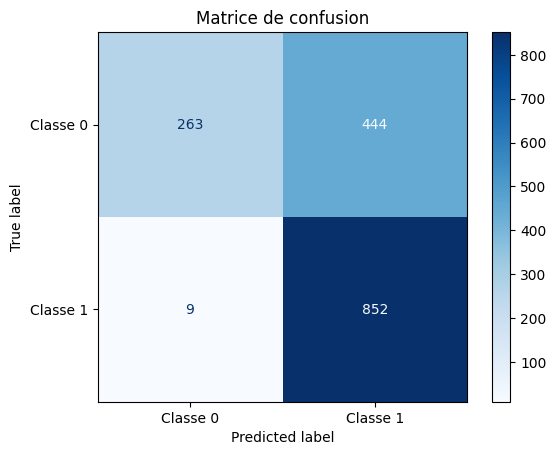

In [58]:
# =================================================================
# Classification binaire avec Fréquence relative (Bag-of-Words freq) avec PerceptronBiais - Version 4
# =================================================================
# Cette version utilise la fréquence relative des mots comme caractéristiques

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode fréquence
# Le mode "freq" utilise la fréquence relative (occurrences normalisées par document)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.7282757759094238 secondes


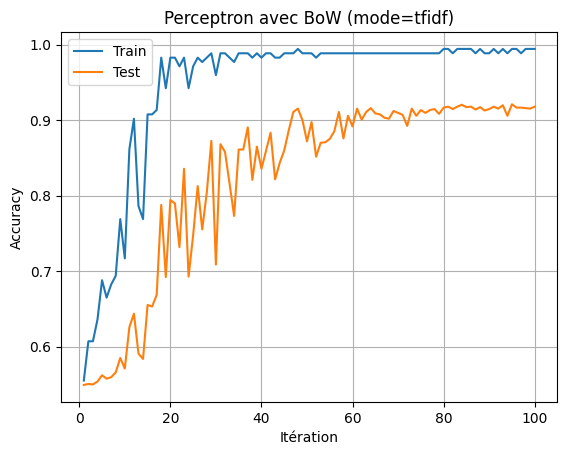

Accuracy finale (train): 0.9942196531791907
Accuracy finale (test) : 0.9177295918367347
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


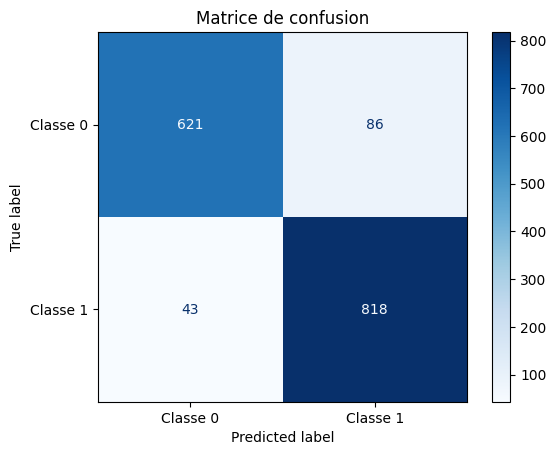

In [59]:
# =================================================================
# Classification binaire avec TF-IDF avec PerceptronBiais - Version 5
# =================================================================
# Cette version utilise le score TF-IDF comme caractéristiques

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle TF-IDF
# TF-IDF pondère les mots par leur importance dans le document et le corpus
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) : 14.851285934448242 secondes
Accuracy entraînement : 0.9891
Accuracy test         : 0.4260


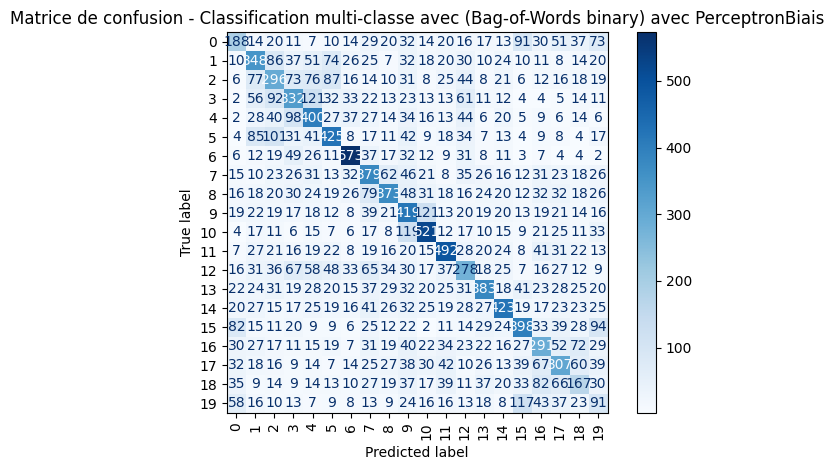

Itération 0: Accuracy = 0.4639
Itération 1: Accuracy = 0.4028
Itération 2: Accuracy = 0.3833
Itération 3: Accuracy = 0.3889
Itération 4: Accuracy = 0.4278
Taux moyen : 0.4133, Écart-type : 0.0296


In [60]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec PerceptronBiais - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptronbiais
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (PerceptronBiais)
perceptron_base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words binary) avec PerceptronBiais")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) : 15.709067106246948 secondes
Accuracy entraînement : 0.9891
Accuracy test         : 0.4524


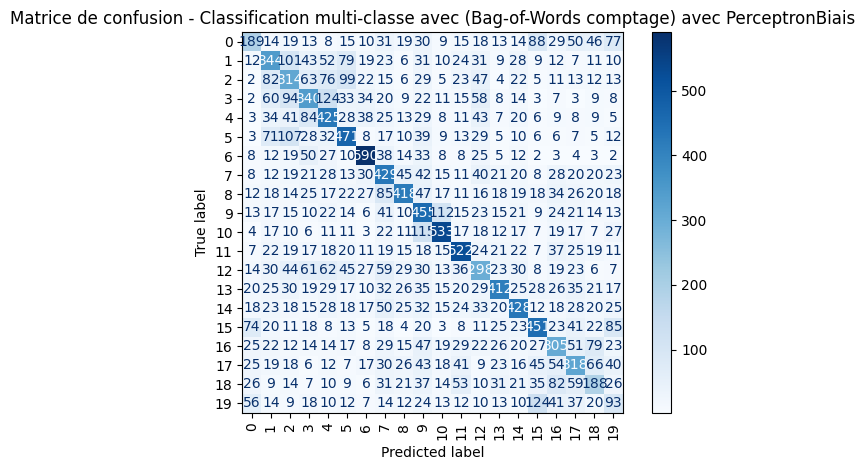

Itération 0: Accuracy = 0.4528
Itération 1: Accuracy = 0.4333
Itération 2: Accuracy = 0.4028
Itération 3: Accuracy = 0.4111
Itération 4: Accuracy = 0.4278
Taux moyen : 0.4256, Écart-type : 0.0175


In [61]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words comptage) avec PerceptronBiais - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptronbiais
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

# Passage en dense + normalisation log(1 + x)
X_train = np.log1p(X_train_sparse.toarray())
X_test = np.log1p(X_test_sparse.toarray())

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (PerceptronBiais)
perceptron_base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words comptage) avec PerceptronBiais")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) : 22.410446166992188 secondes
Accuracy entraînement : 0.9815
Accuracy test         : 0.5198


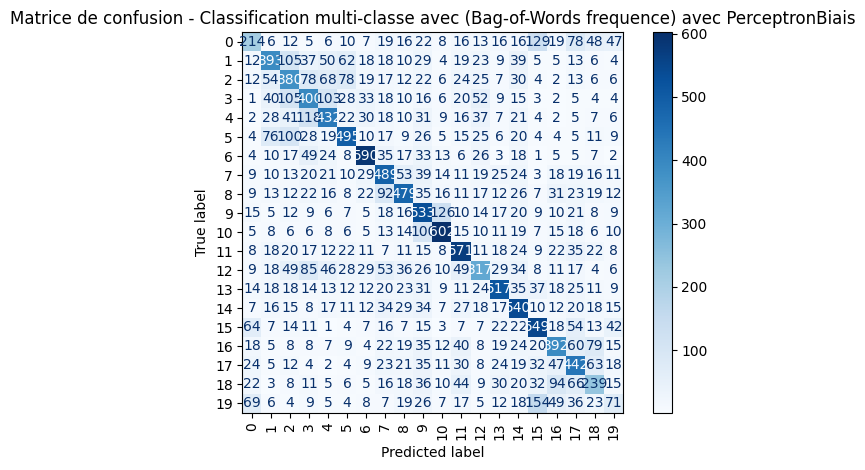

Itération 0: Accuracy = 0.5167
Itération 1: Accuracy = 0.5139
Itération 2: Accuracy = 0.4944
Itération 3: Accuracy = 0.4861
Itération 4: Accuracy = 0.5111
Taux moyen : 0.5044, Écart-type : 0.0120


In [62]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words frequence) avec PerceptronBiais - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptronbiais
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

# Passage en dense
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# L2-normalisation manuelle
def l2_normalize(X):
    norms = np.linalg.norm(X, axis=1, keepdims=True)
    norms[norms == 0] = 1
    return X / norms

X_train = l2_normalize(X_train)
X_test = l2_normalize(X_test)

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (PerceptronBiais)
perceptron_base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words frequence) avec PerceptronBiais")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) : 24.897457122802734 secondes
Accuracy entraînement : 0.9788
Accuracy test         : 0.5675


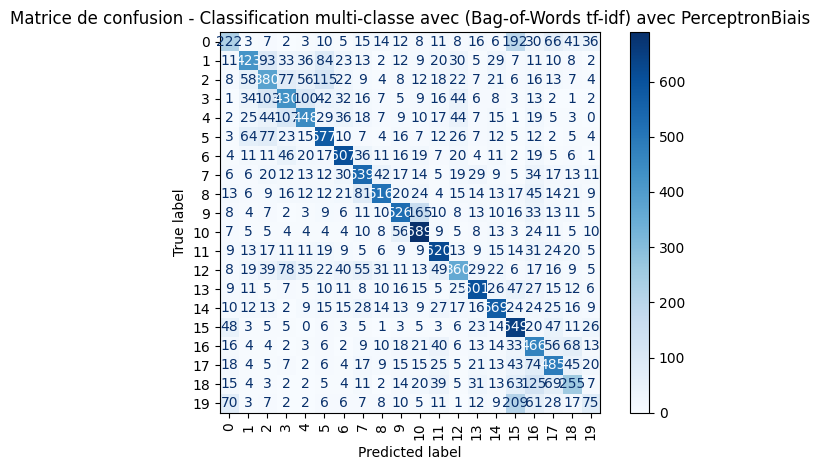

Itération 0: Accuracy = 0.5667
Itération 1: Accuracy = 0.5361
Itération 2: Accuracy = 0.5583
Itération 3: Accuracy = 0.5444
Itération 4: Accuracy = 0.5861
Taux moyen : 0.5583, Écart-type : 0.0175


In [63]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words tf-idf) avec PerceptronBiais - Version 4
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptronbiais
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (PerceptronBiais)
perceptron_base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec (Bag-of-Words tf-idf) avec PerceptronBiais")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

# Classifier KNN avec distance euclidienne

K = 3

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.79603 secondes
Accuracy (train) : 0.9133
Accuracy (test) : 0.5236
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6176
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5), np.float64(0.6764705882352942), np.float64(0.6176470588235294), np.float64(0.5), np.float64(0.5)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0744


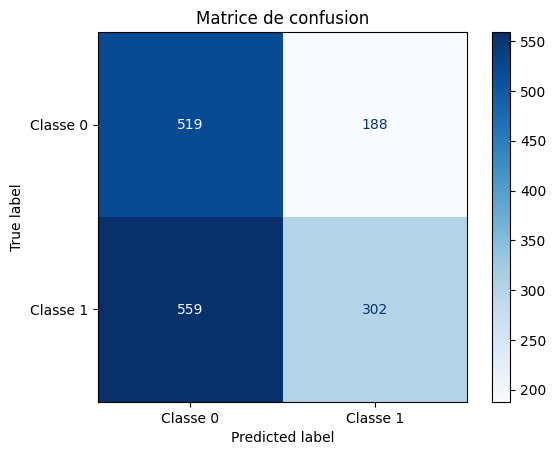

In [64]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance euclidienne (k = 3) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.79690 secondes
Accuracy (train) : 0.9306
Accuracy (test) : 0.6129
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6471
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7059
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.4706
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5), np.float64(0.6470588235294118), np.float64(0.7058823529411765), np.float64(0.5), np.float64(0.47058823529411764)]
Taux moyen de bonne classification : 0.5647
Écart-type : 0.0937


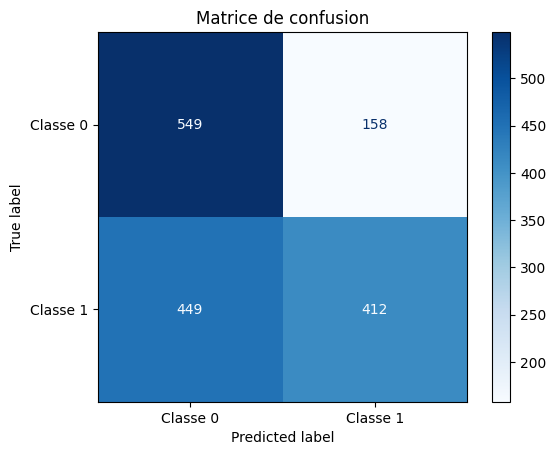

In [65]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance euclidienne (k = 3) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.80271 secondes
Accuracy (train) : 0.9827
Accuracy (test) : 0.7577
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7353
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6176
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7059
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.7352941176470589), np.float64(0.6176470588235294), np.float64(0.6764705882352942), np.float64(0.7941176470588235), np.float64(0.7058823529411765)]
Taux moyen de bonne classification : 0.7059
Écart-type : 0.0588


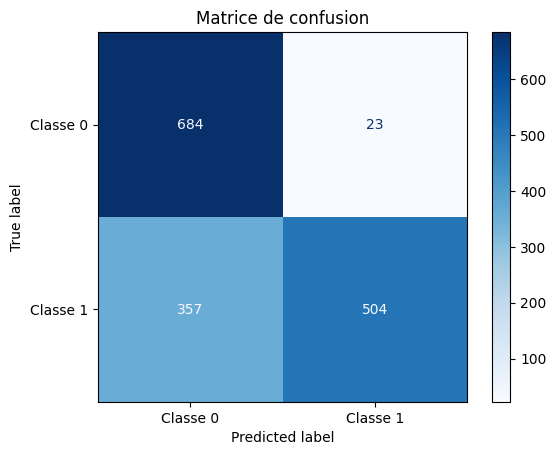

In [66]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance euclidienne (k = 3) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.80374 secondes
Accuracy (train) : 0.9942
Accuracy (test) : 0.8361
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8235
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6471
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7353
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8235294117647058), np.float64(0.6470588235294118), np.float64(0.8823529411764706), np.float64(0.7352941176470589), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.7882
Écart-type : 0.0861


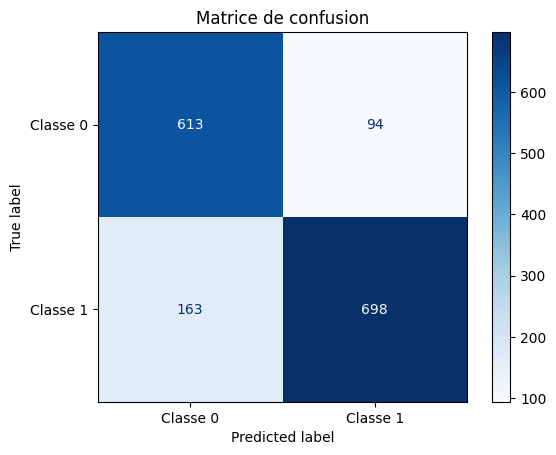

In [67]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance euclidienne (k = 3) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.007567167282104492 secondes
Accuracy entraînement : 0.3252
Accuracy test         : 0.0783


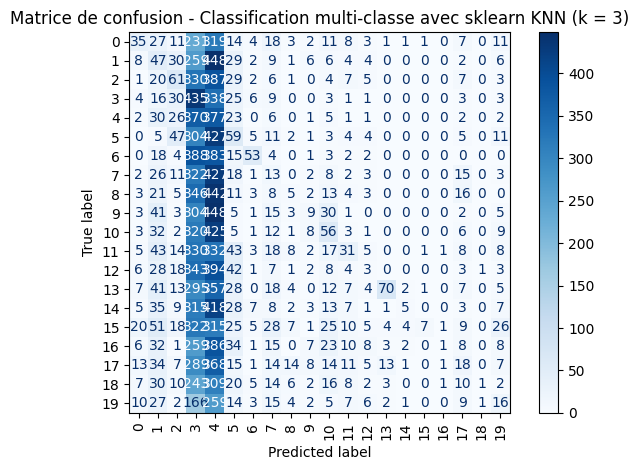

Itération 0: Accuracy = 0.0788
Itération 1: Accuracy = 0.0763
Itération 2: Accuracy = 0.0681
Itération 3: Accuracy = 0.0790
Itération 4: Accuracy = 0.0845
Taux moyen : 0.0773, Écart-type : 0.0053


In [68]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec KNN sklearn (k = 3) - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.01612067222595215 secondes
Accuracy entraînement : 0.3883
Accuracy test         : 0.1278


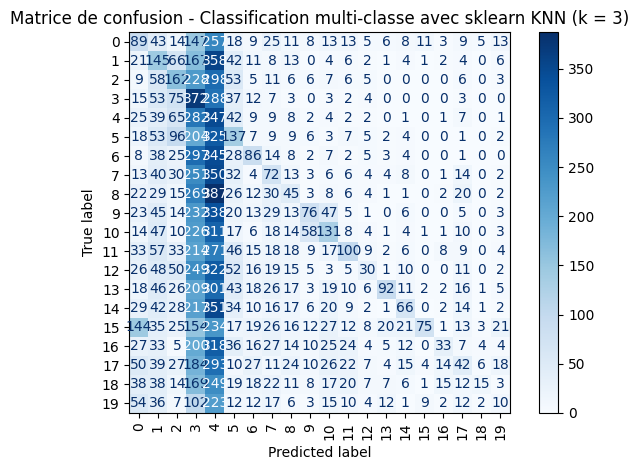

Itération 0: Accuracy = 0.1005
Itération 1: Accuracy = 0.0981
Itération 2: Accuracy = 0.1199
Itération 3: Accuracy = 0.1281
Itération 4: Accuracy = 0.1444
Taux moyen : 0.1182, Écart-type : 0.0173


In [70]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Comptage) avec KNN sklearn (k = 3) - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.01175999641418457 secondes
Accuracy entraînement : 0.3617
Accuracy test         : 0.1158


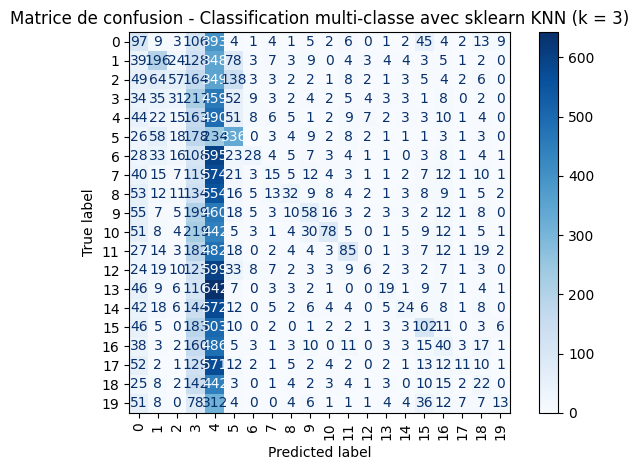

Itération 0: Accuracy = 0.1250
Itération 1: Accuracy = 0.0954
Itération 2: Accuracy = 0.1281
Itération 3: Accuracy = 0.1008
Itération 4: Accuracy = 0.0872
Taux moyen : 0.1073, Écart-type : 0.0163


In [71]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Frequence) avec KNN sklearn (k = 3) - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe avec sklearn KNN) : 0.008476972579956055 secondes
Accuracy entraînement : 0.3203
Accuracy test         : 0.0981


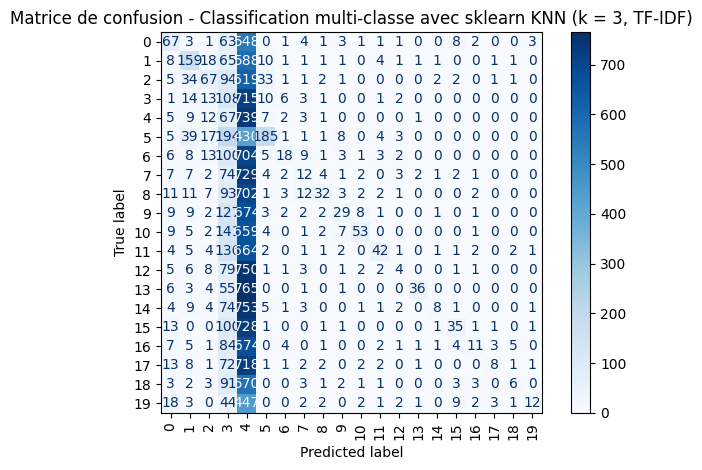

Itération 0: Accuracy = 0.0815
Itération 1: Accuracy = 0.0763
Itération 2: Accuracy = 0.0845
Itération 3: Accuracy = 0.0926
Itération 4: Accuracy = 0.0845
Taux moyen : 0.0839, Écart-type : 0.0053


In [72]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words tf-idf) avec sklearn KNN (k = 3) - Version 4
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
k = 3
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation TF-IDF
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe avec sklearn KNN) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3, TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

k = 5

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.83509 secondes
Accuracy (train) : 0.7803
Accuracy (test) : 0.5485
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.4412
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5882
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6176
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.4411764705882353), np.float64(0.6764705882352942), np.float64(0.5882352941176471), np.float64(0.6176470588235294), np.float64(0.5)]
Taux moyen de bonne classification : 0.5647
Écart-type : 0.0840


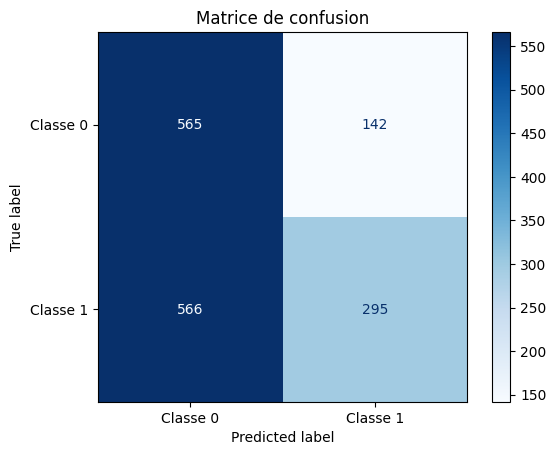

In [73]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance euclidienne (k = 5) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.96515 secondes
Accuracy (train) : 0.7919
Accuracy (test) : 0.5784
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6471
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6176
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5), np.float64(0.6470588235294118), np.float64(0.6764705882352942), np.float64(0.6176470588235294), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.6000
Écart-type : 0.0634


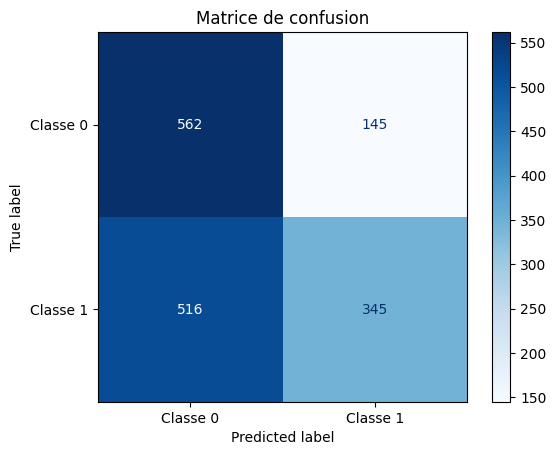

In [74]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance euclidienne (k = 5) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 3.16788 secondes
Accuracy (train) : 0.8960
Accuracy (test) : 0.6849
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5294
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5294
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5294
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5294117647058824), np.float64(0.5294117647058824), np.float64(0.5294117647058824), np.float64(0.5588235294117647), np.float64(0.6764705882352942)]
Taux moyen de bonne classification : 0.5647
Écart-type : 0.0570


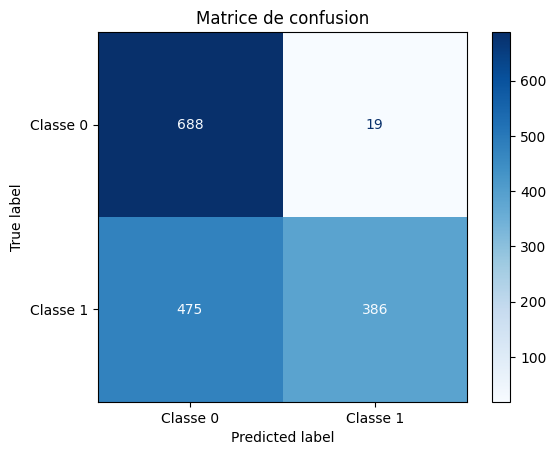

In [75]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance euclidienne (k = 5) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 3.26109 secondes
Accuracy (train) : 0.9653
Accuracy (test) : 0.6818
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5294
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.4706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7059
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5294117647058824), np.float64(0.5), np.float64(0.6764705882352942), np.float64(0.47058823529411764), np.float64(0.7058823529411765)]
Taux moyen de bonne classification : 0.5765
Écart-type : 0.0959


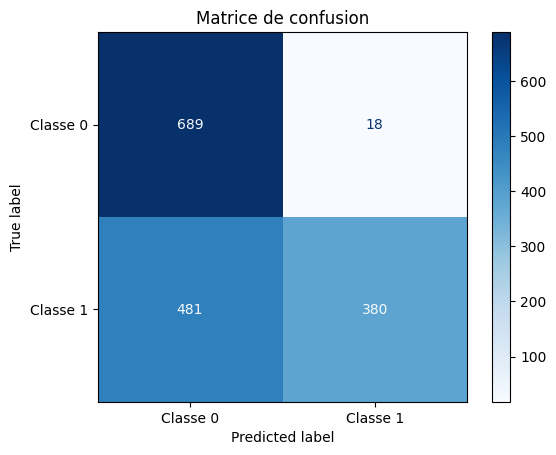

In [76]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance euclidienne (k = 5) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.008249759674072266 secondes
Accuracy entraînement : 0.2435
Accuracy test         : 0.0752


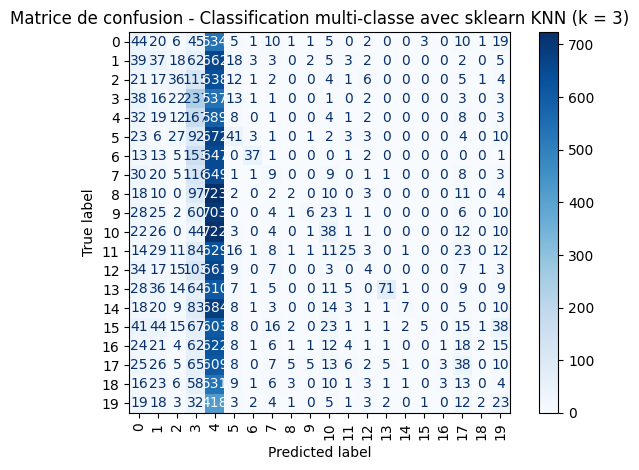

Itération 0: Accuracy = 0.0788
Itération 1: Accuracy = 0.0763
Itération 2: Accuracy = 0.0681
Itération 3: Accuracy = 0.0790
Itération 4: Accuracy = 0.0845
Taux moyen : 0.0773, Écart-type : 0.0053


In [77]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec KNN sklearn (k = 5) - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.007130146026611328 secondes
Accuracy entraînement : 0.3110
Accuracy test         : 0.1286


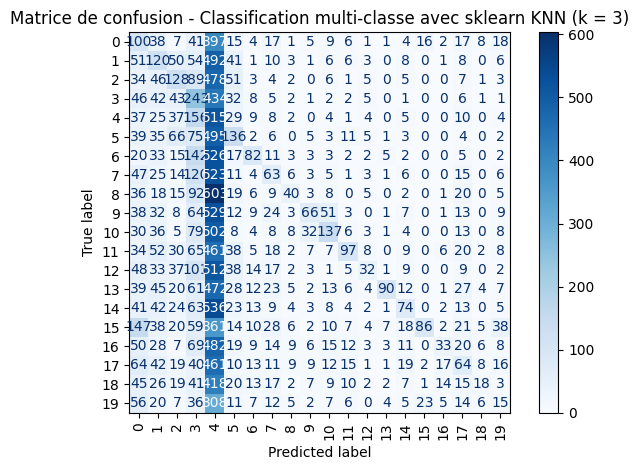

Itération 0: Accuracy = 0.1005
Itération 1: Accuracy = 0.0981
Itération 2: Accuracy = 0.1199
Itération 3: Accuracy = 0.1281
Itération 4: Accuracy = 0.1444
Taux moyen : 0.1182, Écart-type : 0.0173


In [78]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Comptage) avec KNN sklearn (k = 5) - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.010577917098999023 secondes
Accuracy entraînement : 0.2342
Accuracy test         : 0.0981


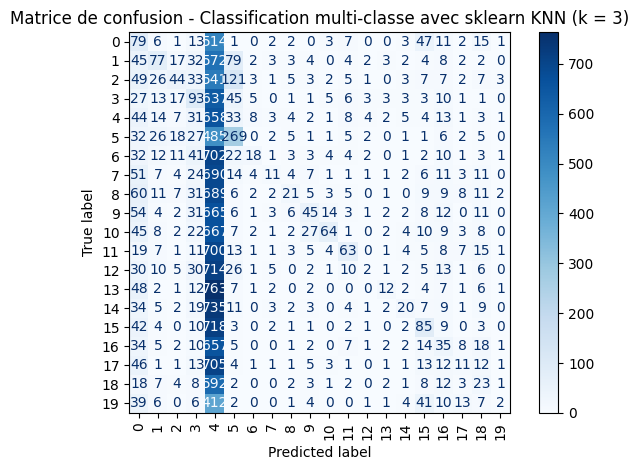

Itération 0: Accuracy = 0.1250
Itération 1: Accuracy = 0.0954
Itération 2: Accuracy = 0.1281
Itération 3: Accuracy = 0.1008
Itération 4: Accuracy = 0.0872
Taux moyen : 0.1073, Écart-type : 0.0163


In [79]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Frequence) avec KNN sklearn (k = 5) - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe avec sklearn KNN) : 0.009913921356201172 secondes
Accuracy entraînement : 0.1699
Accuracy test         : 0.0780


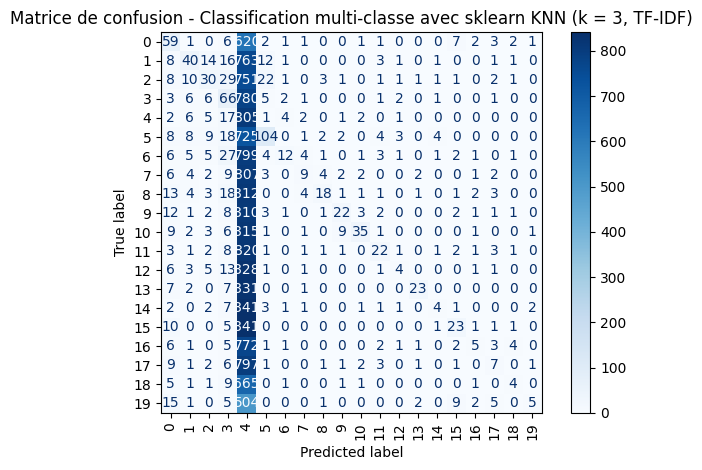

Itération 0: Accuracy = 0.0707
Itération 1: Accuracy = 0.0708
Itération 2: Accuracy = 0.0708
Itération 3: Accuracy = 0.0981
Itération 4: Accuracy = 0.0736
Taux moyen : 0.0768, Écart-type : 0.0107


In [80]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words tf-idf) avec sklearn KNN (k = 5) - Version 4
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
k = 5
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation TF-IDF
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe avec sklearn KNN) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3, TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

k = sqrt(taille de dataset)

In [81]:
k = math.sqrt(len(newsgroups_df_neitoie))
k

135.88966112254457

Apprentissage effectué en 0.00003 secondes
Prédiction sur test effectuée en 3.18741 secondes
Accuracy (train) : 0.5491
Accuracy (test) : 0.5510
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


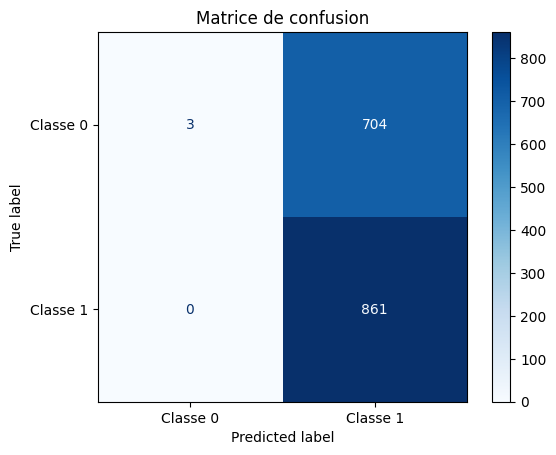

In [82]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance euclidienne (k = 135) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 3.16653 secondes
Accuracy (train) : 0.5491
Accuracy (test) : 0.5517
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


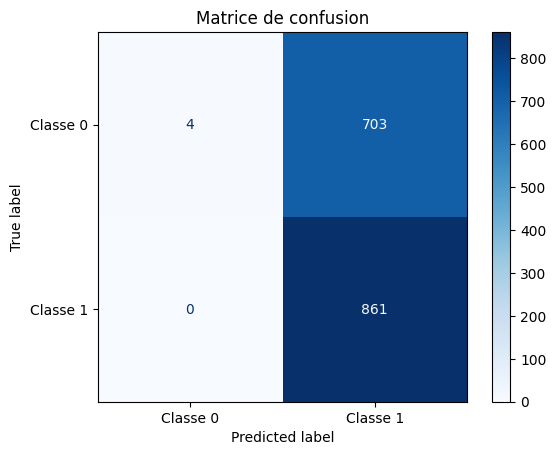

In [83]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance euclidienne (k = 135) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 3.08743 secondes
Accuracy (train) : 0.5491
Accuracy (test) : 0.5491
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


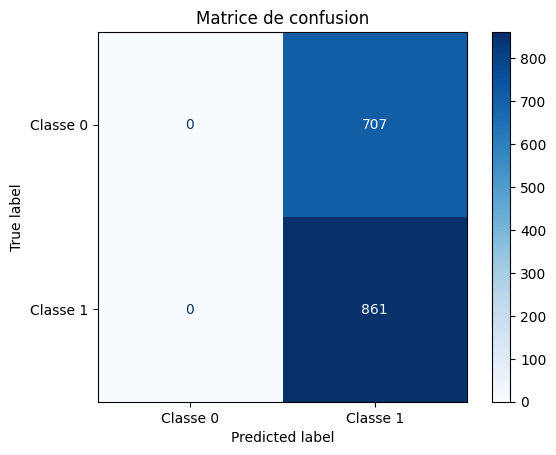

In [84]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance euclidienne (k = 135) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 3.05594 secondes
Accuracy (train) : 0.5491
Accuracy (test) : 0.5491
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


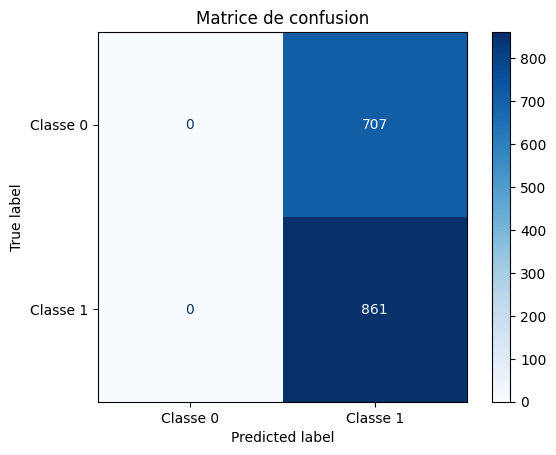

In [85]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance euclidienne (k = 135) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.01529693603515625 secondes
Accuracy entraînement : 0.0719
Accuracy test         : 0.0633


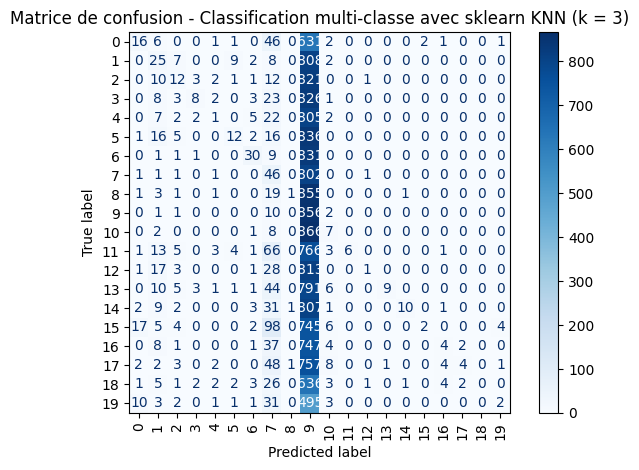

Itération 0: Accuracy = 0.0679
Itération 1: Accuracy = 0.0926
Itération 2: Accuracy = 0.0899
Itération 3: Accuracy = 0.0627
Itération 4: Accuracy = 0.0572
Taux moyen : 0.0741, Écart-type : 0.0145


In [87]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec KNN sklearn (k = 135) - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)
k = 135
# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=135, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.017328977584838867 secondes
Accuracy entraînement : 0.1198
Accuracy test         : 0.0977


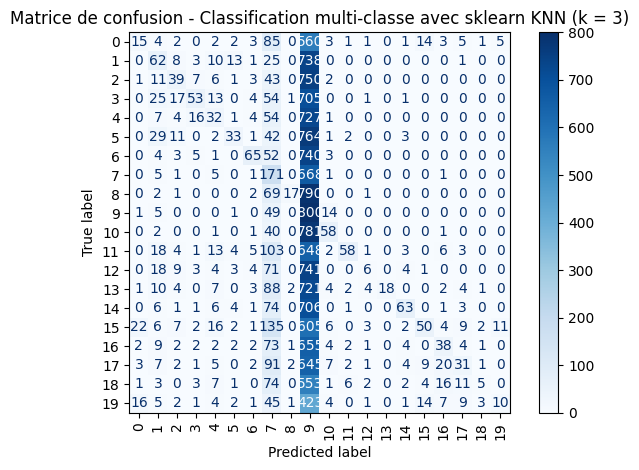

Itération 0: Accuracy = 0.0707
Itération 1: Accuracy = 0.1035
Itération 2: Accuracy = 0.0981
Itération 3: Accuracy = 0.0817
Itération 4: Accuracy = 0.0845
Taux moyen : 0.0877, Écart-type : 0.0118


In [88]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Comptage) avec KNN sklearn (k = 135) - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)
k = 135
# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=135, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) avec sklearn KNN : 0.013354063034057617 secondes
Accuracy entraînement : 0.0910
Accuracy test         : 0.0732


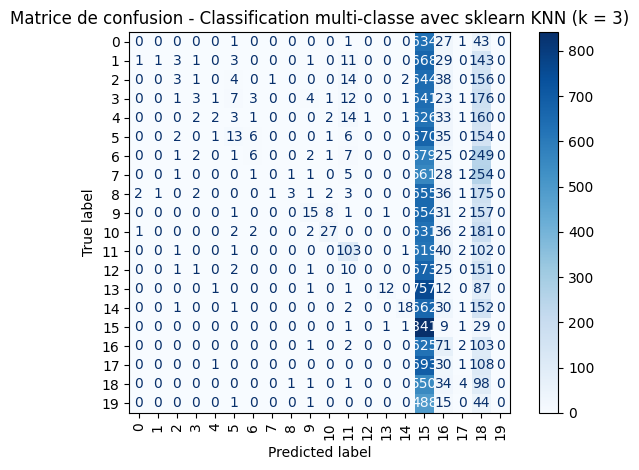

Itération 0: Accuracy = 0.0625
Itération 1: Accuracy = 0.0572
Itération 2: Accuracy = 0.0708
Itération 3: Accuracy = 0.0599
Itération 4: Accuracy = 0.0599
Taux moyen : 0.0621, Écart-type : 0.0047


In [89]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Frequence) avec KNN sklearn (k = 135) - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"   # "binary", "count", "freq", "tfidf" (fonction bag_of_words_tfidf_manual)
k = 135
# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=135, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()

print("Temps d'entraînement (multi-classe) avec sklearn KNN :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe avec sklearn KNN) : 0.017281770706176758 secondes
Accuracy entraînement : 0.1155
Accuracy test         : 0.0873


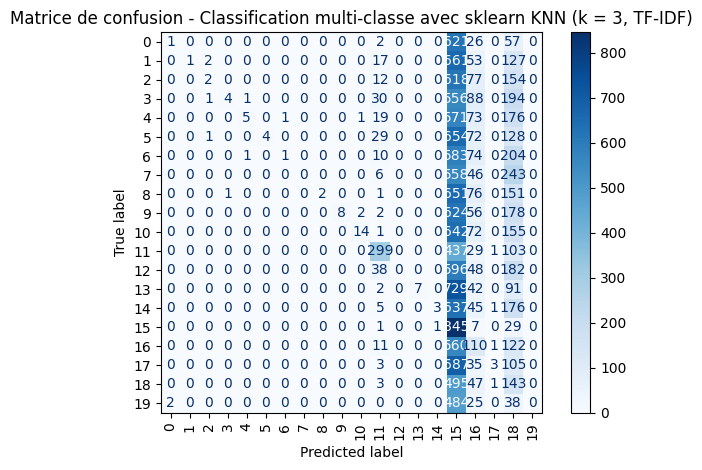

Itération 0: Accuracy = 0.0543
Itération 1: Accuracy = 0.0572
Itération 2: Accuracy = 0.0845
Itération 3: Accuracy = 0.0654
Itération 4: Accuracy = 0.0572
Taux moyen : 0.0637, Écart-type : 0.0110


In [90]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words tf-idf) avec sklearn KNN (k = 135) - Version 4
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
k = 135
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation TF-IDF
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe avec sklearn KNN
# ---------------------------

knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

start = time.time()
knn_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe avec sklearn KNN) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe avec sklearn KNN (k = 3, TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]
    
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(Xapp, Yapp)
    Y_pred = clf.predict(Xval)
    
    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

# Classifier KNN avec distance cosinus

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.33372 secondes
Accuracy (train) : 0.9191
Accuracy (test) : 0.8323
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.9411764705882353), np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8647
Écart-type : 0.0478


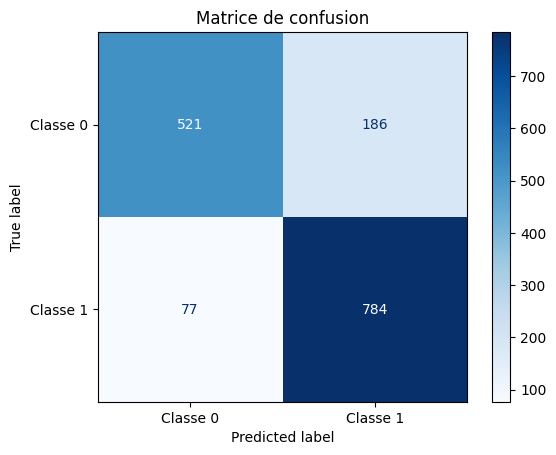

In [91]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance cosinus (k = 3) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.31408 secondes
Accuracy (train) : 0.9133
Accuracy (test) : 0.8629
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.8823529411764706), np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8529
Écart-type : 0.0322


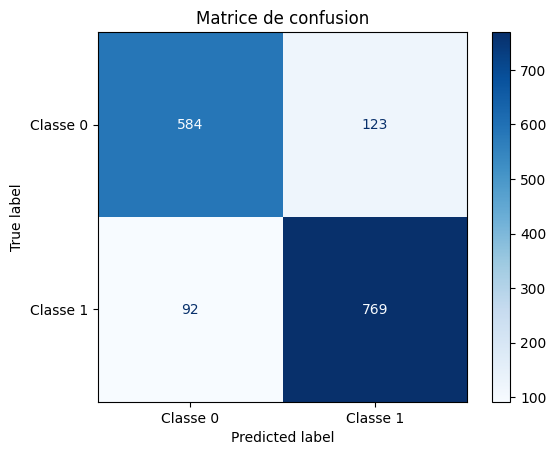

In [92]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance cosinus (k = 3) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.28902 secondes
Accuracy (train) : 0.9133
Accuracy (test) : 0.8622
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.8823529411764706), np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8529
Écart-type : 0.0322


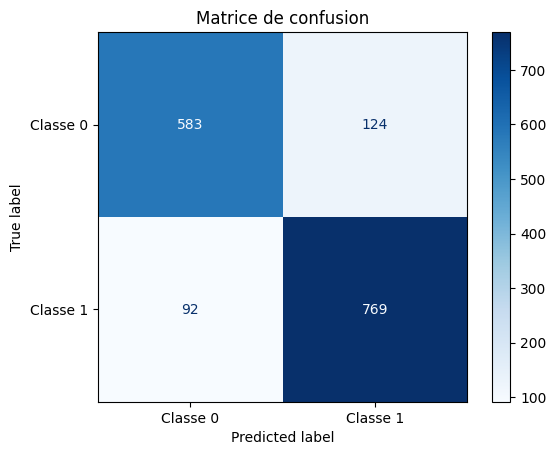

In [93]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance cosinus (k = 3) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.44204 secondes
Accuracy (train) : 0.9480
Accuracy (test) : 0.8807
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.9411764705882353), np.float64(0.9411764705882353), np.float64(0.8529411764705882), np.float64(0.8823529411764706), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.8941
Écart-type : 0.0399


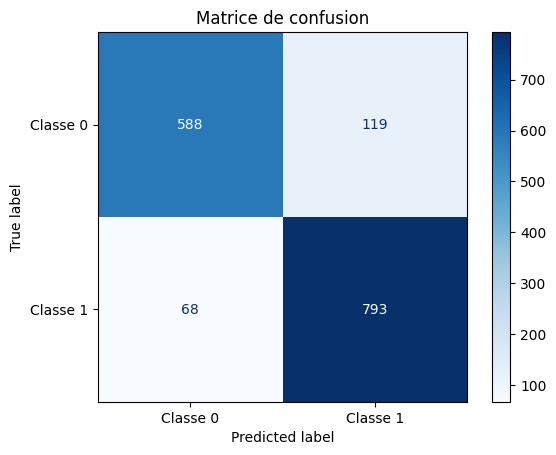

In [94]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance cosinus (k = 3) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (avec sklearn + cosine distance) : 0.003222942352294922 secondes
Accuracy entraînement : 0.5501
Accuracy test         : 0.2569


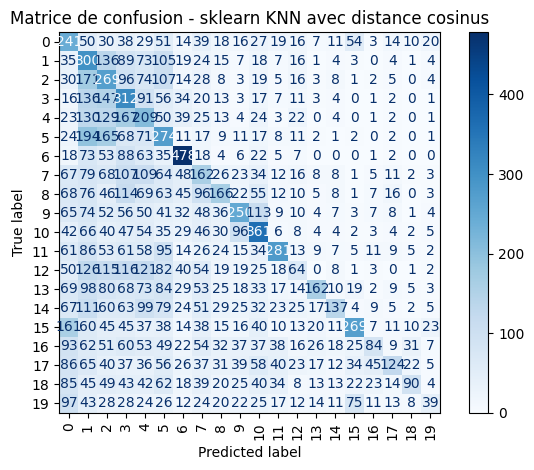

Itération 0: Accuracy = 0.2609
Itération 1: Accuracy = 0.2316
Itération 2: Accuracy = 0.2316
Itération 3: Accuracy = 0.3025
Itération 4: Accuracy = 0.2289
Taux moyen : 0.2511, Écart-type : 0.0282


In [95]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec sklearn KNN (cosine distance, k=3) - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"
k = 3
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (avec sklearn + cosine distance) : 0.002089977264404297 secondes
Accuracy entraînement : 0.5561
Accuracy test         : 0.3004


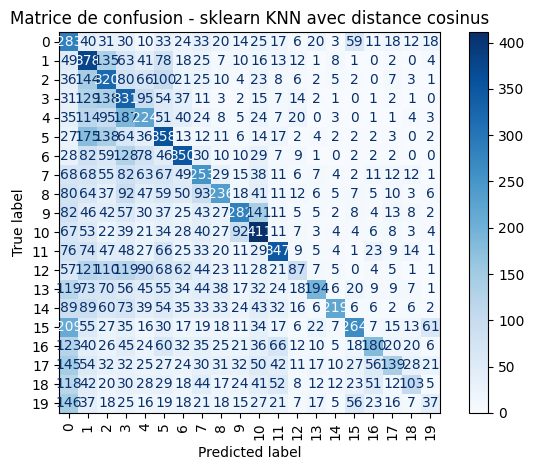

Itération 0: Accuracy = 0.2799
Itération 1: Accuracy = 0.2725
Itération 2: Accuracy = 0.2807
Itération 3: Accuracy = 0.2616
Itération 4: Accuracy = 0.2861
Taux moyen : 0.2761, Écart-type : 0.0085


In [96]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words comptage) avec sklearn KNN (cosine distance, k=3) - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"
k = 3
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (avec sklearn + cosine distance) : 0.0019378662109375 secondes
Accuracy entraînement : 0.5561
Accuracy test         : 0.3004


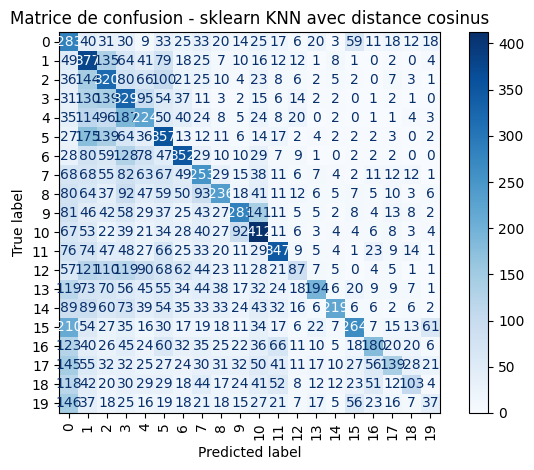

Itération 0: Accuracy = 0.2799
Itération 1: Accuracy = 0.2725
Itération 2: Accuracy = 0.2807
Itération 3: Accuracy = 0.2616
Itération 4: Accuracy = 0.2861
Taux moyen : 0.2761, Écart-type : 0.0085


In [97]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Frequence) avec sklearn KNN (cosine distance, k=3) - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"
k = 3
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (sklearn + cosine distance) : 0.0018210411071777344 secondes
Accuracy entraînement : 0.6389
Accuracy test         : 0.3996


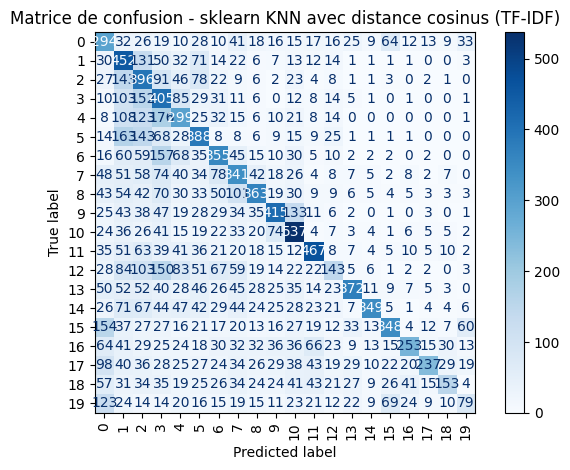

Itération 0: Accuracy = 0.3668
Itération 1: Accuracy = 0.3324
Itération 2: Accuracy = 0.3924
Itération 3: Accuracy = 0.3842
Itération 4: Accuracy = 0.3924
Taux moyen : 0.3736, Écart-type : 0.0226


In [98]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words TF-IDF) avec sklearn KNN (cosine distance, k=3) - Version 4
# =================================================================

# ---------------------------
# Paramètres
# ---------------------------
k = 3
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# TF-IDF vectorisation (manuelle)
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement sklearn KNN avec distance cosinus
# ---------------------------
D_train = cosine_distances(X_train)           
knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (sklearn + cosine distance) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------
D_test = cosine_distances(X_test, X_train)        # distance test vs train

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus (TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (Stratifiée)
# ---------------------------
skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

k = 5

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.32580 secondes
Accuracy (train) : 0.9133
Accuracy (test) : 0.8469
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.8529411764705882), np.float64(0.7941176470588235), np.float64(0.8823529411764706), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8412
Écart-type : 0.0399


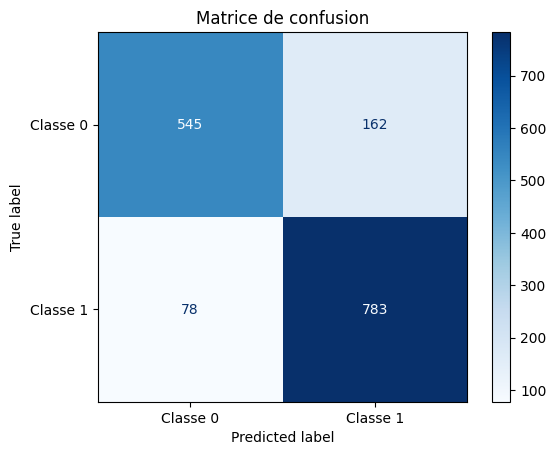

In [99]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance cosinus (k = 5) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.31347 secondes
Accuracy (train) : 0.9191
Accuracy (test) : 0.8661
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9118
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.9117647058823529), np.float64(0.8529411764705882), np.float64(0.7941176470588235), np.float64(0.8823529411764706), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.8588
Écart-type : 0.0390


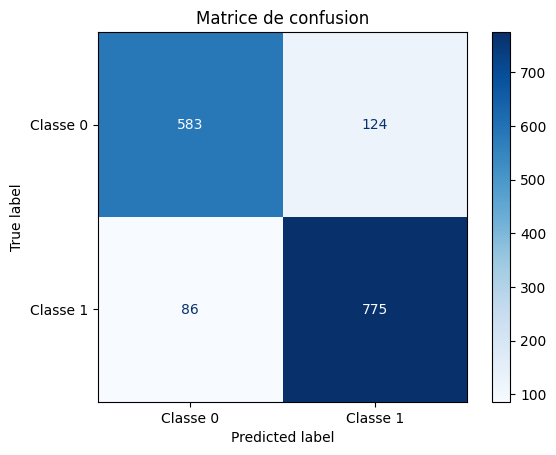

In [100]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance cosinus (k = 5) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00004 secondes
Prédiction sur test effectuée en 1.29489 secondes
Accuracy (train) : 0.9191
Accuracy (test) : 0.8654
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9118
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.9117647058823529), np.float64(0.8529411764705882), np.float64(0.7941176470588235), np.float64(0.8823529411764706), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.8588
Écart-type : 0.0390


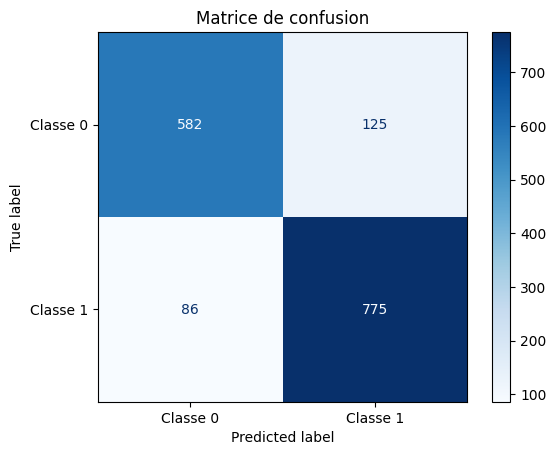

In [101]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance cosinus (k = 5) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.30947 secondes
Accuracy (train) : 0.9480
Accuracy (test) : 0.8884
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.9705882352941176), np.float64(0.8823529411764706), np.float64(0.9411764705882353), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.9059
Écart-type : 0.0432


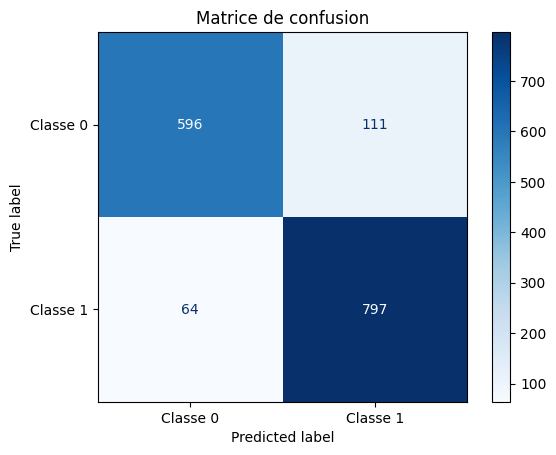

In [102]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance cosinus (k = 5) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=5)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (avec sklearn + cosine distance) : 0.0022890567779541016 secondes
Accuracy entraînement : 0.5349
Accuracy test         : 0.2896


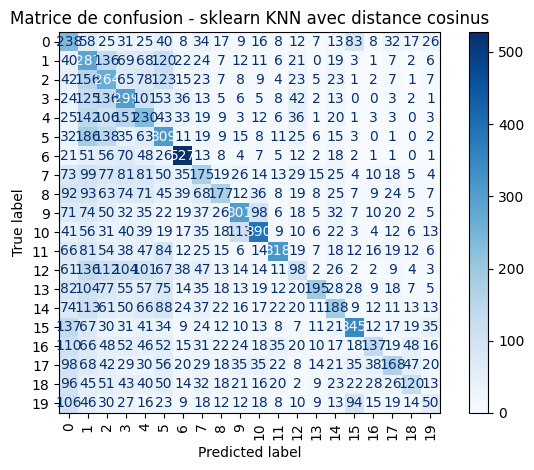

Itération 0: Accuracy = 0.2989
Itération 1: Accuracy = 0.2589
Itération 2: Accuracy = 0.2807
Itération 3: Accuracy = 0.3079
Itération 4: Accuracy = 0.2807
Taux moyen : 0.2854, Écart-type : 0.0170


In [103]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words binary) avec sklearn KNN (cosine distance, k=5) - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"
k = 5
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (avec sklearn + cosine distance) : 0.00215911865234375 secondes
Accuracy entraînement : 0.5664
Accuracy test         : 0.3333


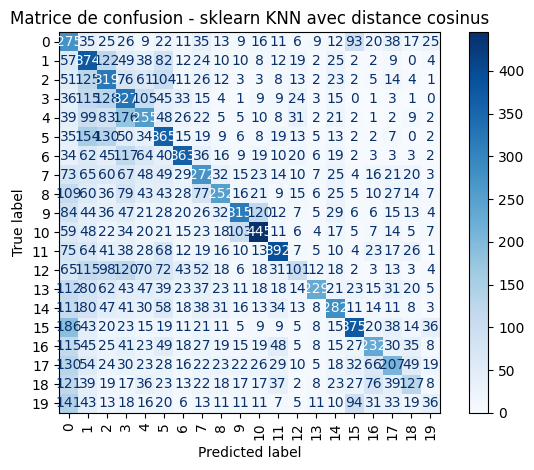

Itération 0: Accuracy = 0.3043
Itération 1: Accuracy = 0.3106
Itération 2: Accuracy = 0.3161
Itération 3: Accuracy = 0.3243
Itération 4: Accuracy = 0.3161
Taux moyen : 0.3143, Écart-type : 0.0066


In [104]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Comptage) avec sklearn KNN (cosine distance, k=5) - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"
k = 5
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (avec sklearn + cosine distance) : 0.00177001953125 secondes
Accuracy entraînement : 0.5670
Accuracy test         : 0.3332


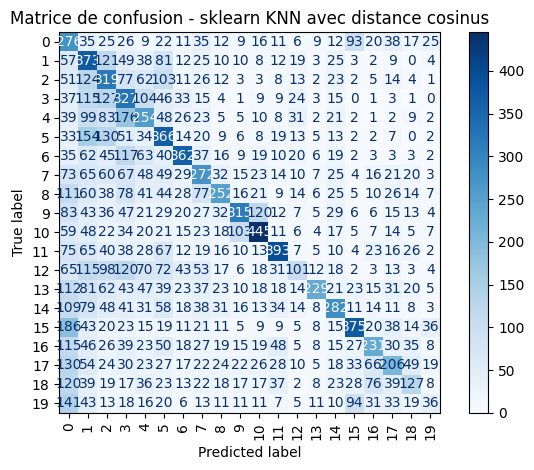

Itération 0: Accuracy = 0.3043
Itération 1: Accuracy = 0.3106
Itération 2: Accuracy = 0.3161
Itération 3: Accuracy = 0.3270
Itération 4: Accuracy = 0.3161
Taux moyen : 0.3148, Écart-type : 0.0075


In [105]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Frequence) avec sklearn KNN (cosine distance, k=5) - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"
k = 5
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (sklearn + cosine distance) : 0.0019829273223876953 secondes
Accuracy entraînement : 0.6275
Accuracy test         : 0.4408


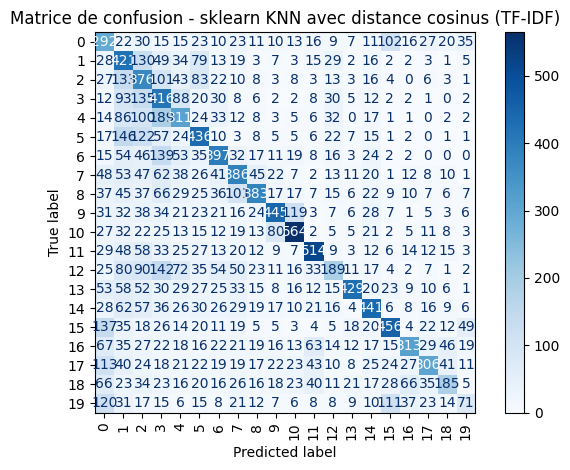

Itération 0: Accuracy = 0.4484
Itération 1: Accuracy = 0.4060
Itération 2: Accuracy = 0.4223
Itération 3: Accuracy = 0.4251
Itération 4: Accuracy = 0.4114
Taux moyen : 0.4226, Écart-type : 0.0146


In [106]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words TF-IDF) avec sklearn KNN (cosine distance, k=5) - Version 4
# =================================================================

# ---------------------------
# Paramètres
# ---------------------------
k = 5
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# TF-IDF vectorisation (manuelle)
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement sklearn KNN avec distance cosinus
# ---------------------------
D_train = cosine_distances(X_train)       
knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (sklearn + cosine distance) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------
D_test = cosine_distances(X_test, X_train)        # distance test vs train

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus (TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (Stratifiée)
# ---------------------------
skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

k = 135

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.39356 secondes
Accuracy (train) : 0.5954
Accuracy (test) : 0.5778
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


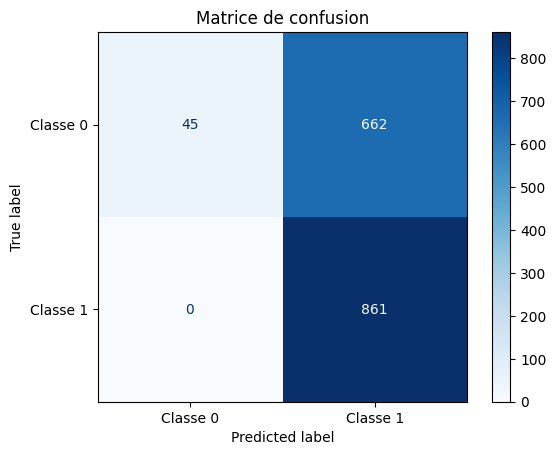

In [107]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance cosinus (k = 135) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.27433 secondes
Accuracy (train) : 0.5954
Accuracy (test) : 0.5759
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


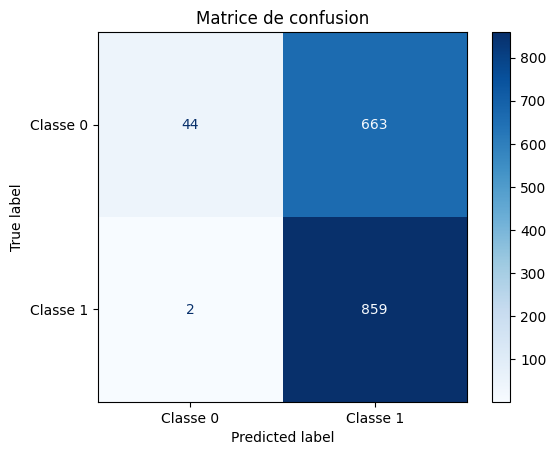

In [108]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance cosinus (k = 135) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.28890 secondes
Accuracy (train) : 0.5954
Accuracy (test) : 0.5765
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


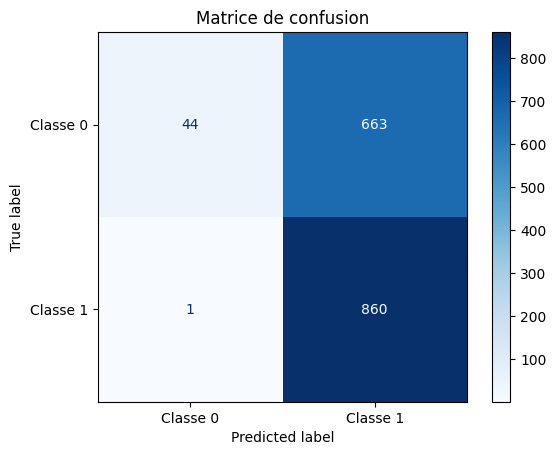

In [109]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance cosinus (k = 135) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 1.37608 secondes
Accuracy (train) : 0.6012
Accuracy (test) : 0.5848
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5588
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647), np.float64(0.5588235294117647)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0000


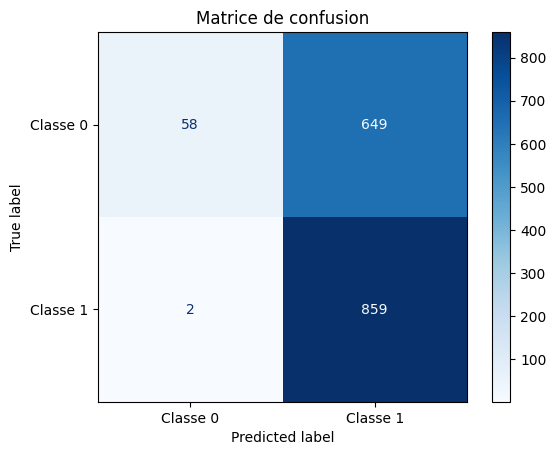

In [110]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance cosinus (k = 135) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=135)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction sur test
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Prédiction sur train
y_pred_train = np.array([knn.predict(x) for x in X_train])
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy (train) : {accuracy_train:.4f}")

# Évaluation sur test
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (avec sklearn + cosine distance) : 0.0017940998077392578 secondes
Accuracy entraînement : 0.4172
Accuracy test         : 0.3843


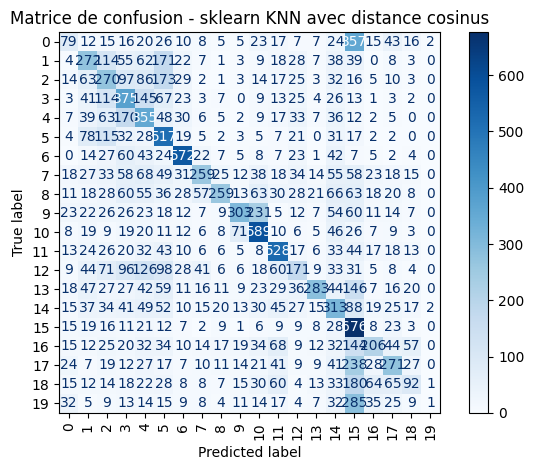

Itération 0: Accuracy = 0.3533
Itération 1: Accuracy = 0.3651
Itération 2: Accuracy = 0.3569
Itération 3: Accuracy = 0.3406
Itération 4: Accuracy = 0.3787
Taux moyen : 0.3589, Écart-type : 0.0127


In [112]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Binaire) avec sklearn KNN (cosine distance, k=135) - Version 1
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"
k = 135
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (avec sklearn + cosine distance) : 0.0018076896667480469 secondes
Accuracy entraînement : 0.4336
Accuracy test         : 0.4026


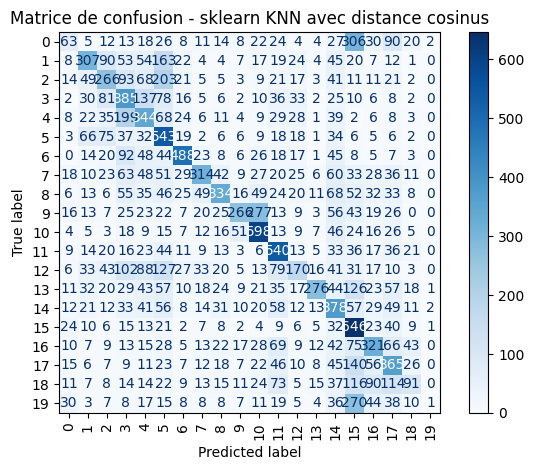

Itération 0: Accuracy = 0.3967
Itération 1: Accuracy = 0.3760
Itération 2: Accuracy = 0.3842
Itération 3: Accuracy = 0.3978
Itération 4: Accuracy = 0.3760
Taux moyen : 0.3862, Écart-type : 0.0096


In [113]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Comptage) avec sklearn KNN (cosine distance, k=135) - Version 2
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"
k = 135
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (avec sklearn + cosine distance) : 0.001825094223022461 secondes
Accuracy entraînement : 0.4341
Accuracy test         : 0.4025


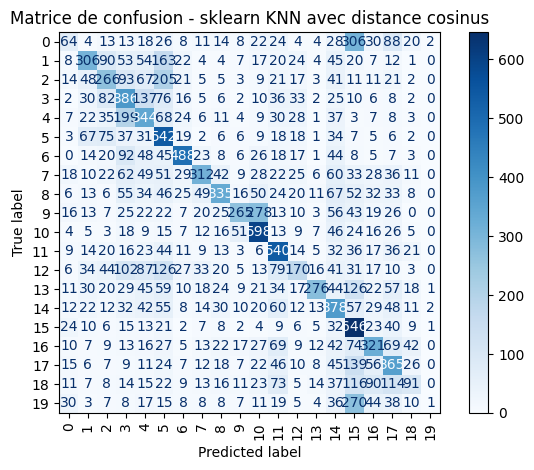

Itération 0: Accuracy = 0.3967
Itération 1: Accuracy = 0.3760
Itération 2: Accuracy = 0.3842
Itération 3: Accuracy = 0.3978
Itération 4: Accuracy = 0.3760
Taux moyen : 0.3862, Écart-type : 0.0096


In [114]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words Frequence) avec sklearn KNN (cosine distance, k=135) - Version 3
# =================================================================

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"
k = 135
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()
D_train = cosine_distances(X_train)

knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (avec sklearn + cosine distance) :", end - start, "secondes")

D_test = cosine_distances(X_test, X_train)

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée
# ---------------------------

skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (sklearn + cosine distance) : 0.0019979476928710938 secondes
Accuracy entraînement : 0.5310
Accuracy test         : 0.4924


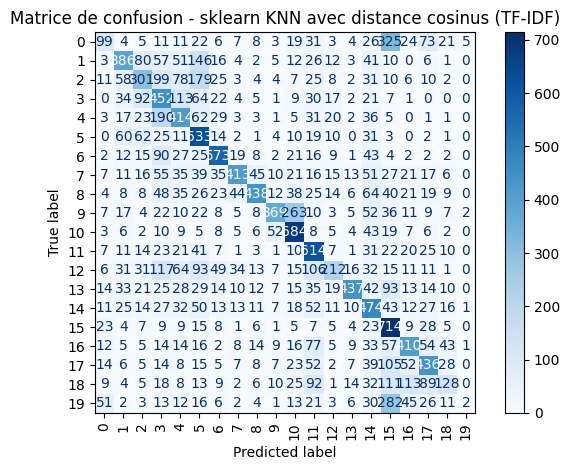

Itération 0: Accuracy = 0.4864
Itération 1: Accuracy = 0.4387
Itération 2: Accuracy = 0.5068
Itération 3: Accuracy = 0.4605
Itération 4: Accuracy = 0.4877
Taux moyen : 0.4760, Écart-type : 0.0238


In [115]:
# =================================================================
# Classification multi-classe avec (Bag-of-Words TF-IDF) avec sklearn KNN (cosine distance, k=135) - Version 4
# =================================================================

# ---------------------------
# Paramètres
# ---------------------------
k = 135
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# TF-IDF vectorisation (manuelle)
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement sklearn KNN avec distance cosinus
# ---------------------------
D_train = cosine_distances(X_train)              
knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')

start = time.time()
knn.fit(D_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (sklearn + cosine distance) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------
D_test = cosine_distances(X_test, X_train)        # distance test vs train

y_train_pred = knn.predict(D_train)
y_test_pred = knn.predict(D_test)

# ---------------------------
# Évaluation
# ---------------------------
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - sklearn KNN avec distance cosinus (TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (Stratifiée)
# ---------------------------
skf = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=42)
perf = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train_multi)):
    Xapp, Yapp = X_train[train_idx], y_train_multi[train_idx]
    Xval, Yval = X_train[test_idx], y_train_multi[test_idx]

    Dapp = cosine_distances(Xapp)
    Dval = cosine_distances(Xval, Xapp)

    clf = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    clf.fit(Dapp, Yapp)
    Y_pred = clf.predict(Dval)

    acc = np.mean(Y_pred == Yval)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

# Classifier Naive Bayes

Temps d'entraînement: 0.0023260116577148438 secondes
Accuracy finale (train): 0.9826589595375722
Accuracy finale (test): 0.920280612244898
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.4965
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5104
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.4965
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5104
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5035
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.49653979238754326), np.float64(0.5103806228373703), np.float64(0.49653979238754326), np.float64(0.5103806228373703), np.float64(0.5034602076124568)]
Taux moyen de bonne classification : 0.5035
Écart-type : 0.0062


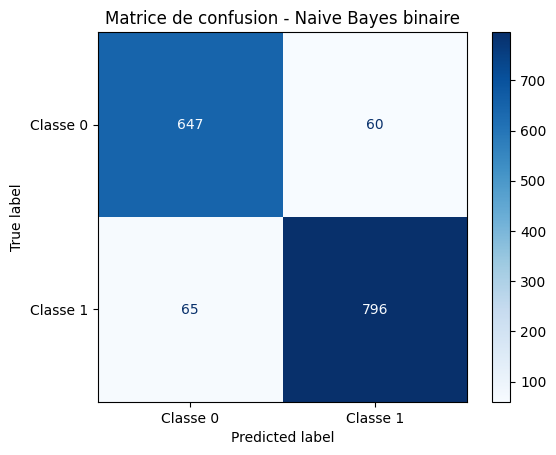

In [116]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec Naive Bayes - Version 1
# ======================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en 0 et 1 (plus simple pour Naive Bayes)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: 0 if x == classe1 else 1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: 0 if x == classe1 else 1)

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec Bag-of-Words mode binaire (sparse)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Initialisation et entraînement du classifieur Naive Bayes
nb_classifier = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)

start = time.time()
nb_classifier.train(X_train_sparse, y_train_bin)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier.predict(X_train_sparse)
y_test_pred = nb_classifier.predict(X_test_sparse)

# Calcul des précisions
train_acc = (y_train_pred == y_train_bin).mean()
test_acc = (y_test_pred == y_test_bin).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier, (X_train_sparse, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes binaire")
plt.show()

Temps d'entraînement: 0.0003299713134765625 secondes
Accuracy finale (train): 0.9826589595375722
Accuracy finale (test): 0.9196428571428571
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5035
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5069
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5069
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5104
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5069
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5034602076124568), np.float64(0.5069204152249135), np.float64(0.5069204152249135), np.float64(0.5103806228373703), np.float64(0.5069204152249135)]
Taux moyen de bonne classification : 0.5069
Écart-type : 0.0022


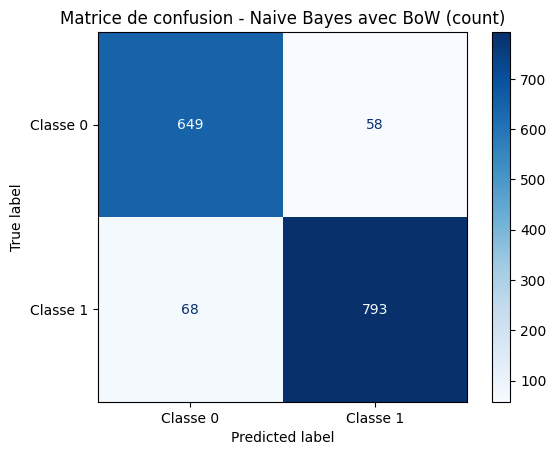

In [117]:
# ======================================================
# Classification binaire avec Bag-of-Words (Count) avec Naive Bayes - Version 2
# ======================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en 0 et 1 (plus simple pour Naive Bayes)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: 0 if x == classe1 else 1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: 0 if x == classe1 else 1)

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec Bag-of-Words mode count (sparse)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Initialisation et entraînement du classifieur Naive Bayes
nb_classifier = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)

start = time.time()
nb_classifier.train(X_train_sparse, y_train_bin)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier.predict(X_train_sparse)
y_test_pred = nb_classifier.predict(X_test_sparse)

# Calcul des précisions
train_acc = (y_train_pred == y_train_bin).mean()
test_acc = (y_test_pred == y_test_bin).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier, (X_train_sparse, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes avec BoW (count)")
plt.show()


Temps d'entraînement: 0.00034308433532714844 secondes
Accuracy finale (train): 0.9884393063583815
Accuracy finale (test): 0.8131377551020408
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5242
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5242
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5346
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5311
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5242
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5242214532871973), np.float64(0.5242214532871973), np.float64(0.5346020761245674), np.float64(0.5311418685121108), np.float64(0.5242214532871973)]
Taux moyen de bonne classification : 0.5277
Écart-type : 0.0044


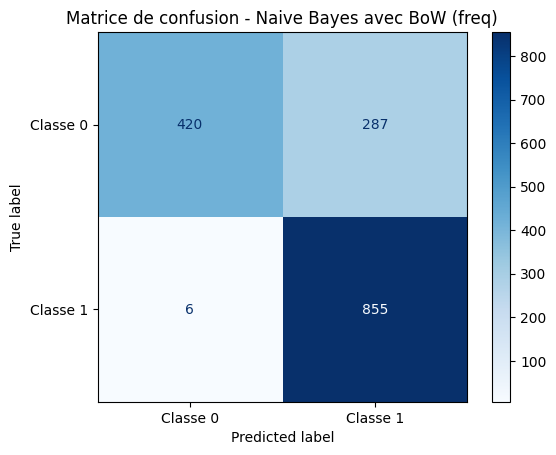

In [118]:
# ======================================================
# Classification binaire avec Bag-of-Words (Frequence) avec Naive Bayes - Version 3
# ======================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en 0 et 1 (plus simple pour Naive Bayes)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: 0 if x == classe1 else 1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: 0 if x == classe1 else 1)

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec Bag-of-Words mode freq (sparse)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Initialisation et entraînement du classifieur Naive Bayes
nb_classifier = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)

start = time.time()
nb_classifier.train(X_train_sparse, y_train_bin)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier.predict(X_train_sparse)
y_test_pred = nb_classifier.predict(X_test_sparse)

# Calcul des précisions
train_acc = (y_train_pred == y_train_bin).mean()
test_acc = (y_test_pred == y_test_bin).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier, (X_train_sparse, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes avec BoW (freq)")
plt.show()


Temps d'entraînement: 0.00033593177795410156 secondes
Accuracy finale (train): 0.9884393063583815
Accuracy finale (test): 0.8679846938775511
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5104
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5208
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5311
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5138
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5208
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5103806228373703), np.float64(0.5207612456747405), np.float64(0.5311418685121108), np.float64(0.513840830449827), np.float64(0.5207612456747405)]
Taux moyen de bonne classification : 0.5194
Écart-type : 0.0071


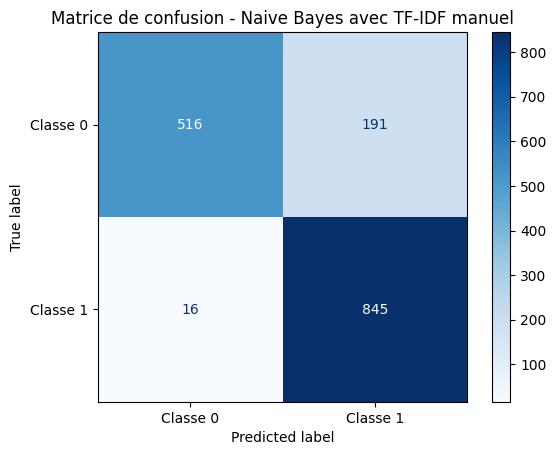

In [119]:
# ======================================================
# Classification binaire avec TF-IDF avec Naive Bayes - Version 4
# ======================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en 0 et 1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: 0 if x == classe1 else 1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: 0 if x == classe1 else 1)

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation TF-IDF manuelle (avec la fonction fournie)
X_train_tfidf, vocab_index = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_tfidf, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

# Initialisation et entraînement du classifieur Naive Bayes
nb_classifier = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)

start = time.time()
nb_classifier.train(X_train_tfidf, y_train_bin)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier.predict(X_train_tfidf)
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Calcul des précisions
train_acc = (y_train_pred == y_train_bin).mean()
test_acc = (y_test_pred == y_test_bin).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier, (X_train_tfidf, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes avec TF-IDF manuel")
plt.show()

Temps d'entraînement: 0.007356166839599609 secondes
Accuracy finale (train): 0.8867102396514162
Accuracy finale (test): 0.4631990378833434
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0515
Itération 1: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0520
Itération 2: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0511
Itération 3: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0516
Itération 4: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0516
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.05145061728395062), np.float64(0.05201388888888889), np.float64(0.05114969135802469), np.float64(0.051604938271604936), np.float64(0.051604938271604936)]
Taux moyen de bonne classification : 0.0516
Écart-type : 0.0003


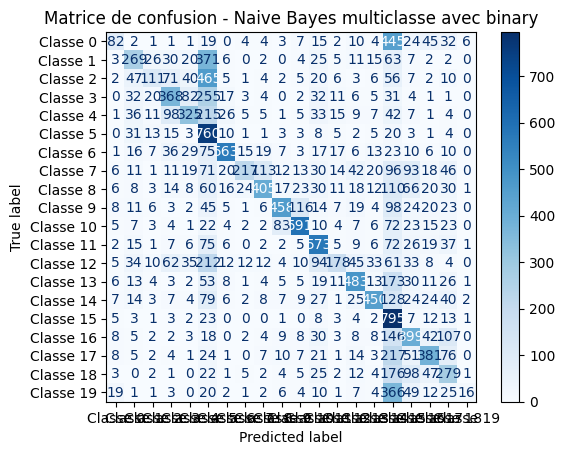

In [121]:
# ======================================================
# Classification multiclasse avec Binary avec Naive Bayes - Version 1
# ======================================================

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()

y_train_multi = df_train['target'].values
y_test_multi = df_test['target'].values

# Vectorisation avec Bag-of-Words mode binary (sparse)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Initialisation du classifieur binaire et du classifieur multi-classe
cl_bin = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)
nb_classifier_multi = classif.ClassifierMultiOAA(cl_bin)

# Entraînement
start = time.time()
nb_classifier_multi.train(X_train_sparse, y_train_multi)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier_multi.predict(X_train_sparse)
y_test_pred = nb_classifier_multi.predict(X_test_sparse)

# Calcul des précisions
train_acc = (y_train_pred == y_train_multi).mean()
test_acc = (y_test_pred == y_test_multi).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement multiclasse
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier_multi, (X_train_sparse, y_train_multi), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
classes_uniques = np.unique(y_test_multi)
cm = confusion_matrix(y_test_multi, y_test_pred, labels=classes_uniques)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {c}" for c in classes_uniques])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes multiclasse avec binary")
plt.show()


Temps d'entraînement: 0.0053441524505615234 secondes
Accuracy finale (train): 0.829520697167756
Accuracy finale (test): 0.4488274203247144
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0504
Itération 1: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0517
Itération 2: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0502
Itération 3: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0507
Itération 4: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0507
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.05043981481481481), np.float64(0.0517283950617284), np.float64(0.05015432098765432), np.float64(0.05065586419753086), np.float64(0.050709876543209874)]
Taux moyen de bonne classification : 0.0507
Écart-type : 0.0005


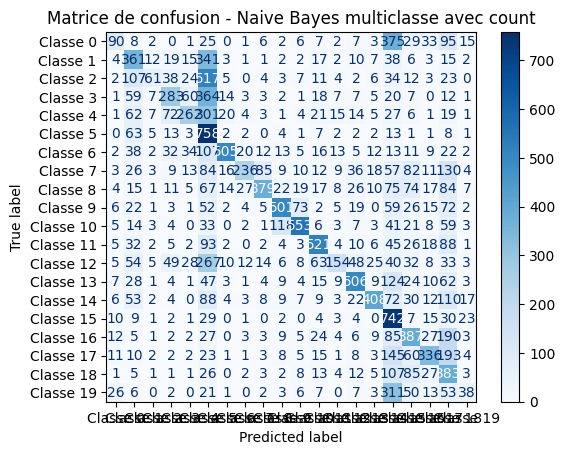

In [122]:
# ======================================================
# Classification multiclasse avec Comptage avec Naive Bayes - Version 2
# ======================================================

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()

y_train_multi = df_train['target'].values
y_test_multi = df_test['target'].values

# Vectorisation avec Bag-of-Words mode count (sparse)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Initialisation du classifieur binaire et du classifieur multi-classe
cl_bin = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)
nb_classifier_multi = classif.ClassifierMultiOAA(cl_bin)

# Entraînement
start = time.time()
nb_classifier_multi.train(X_train_sparse, y_train_multi)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier_multi.predict(X_train_sparse)
y_test_pred = nb_classifier_multi.predict(X_test_sparse)

# Calcul des précisions
train_acc = (y_train_pred == y_train_multi).mean()
test_acc = (y_test_pred == y_test_multi).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement multiclasse
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier_multi, (X_train_sparse, y_train_multi), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
classes_uniques = np.unique(y_test_multi)
cm = confusion_matrix(y_test_multi, y_test_pred, labels=classes_uniques)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {c}" for c in classes_uniques])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes multiclasse avec count")
plt.show()


Temps d'entraînement: 0.008103132247924805 secondes
Accuracy finale (train): 0.789760348583878
Accuracy finale (test): 0.4141912206855081
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0522
Itération 1: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0522
Itération 2: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0520
Itération 3: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0522
Itération 4: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0522
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.052237654320987655), np.float64(0.052222222222222225), np.float64(0.05201388888888889), np.float64(0.052160493827160495), np.float64(0.05219907407407407)]
Taux moyen de bonne classification : 0.0522
Écart-type : 0.0001


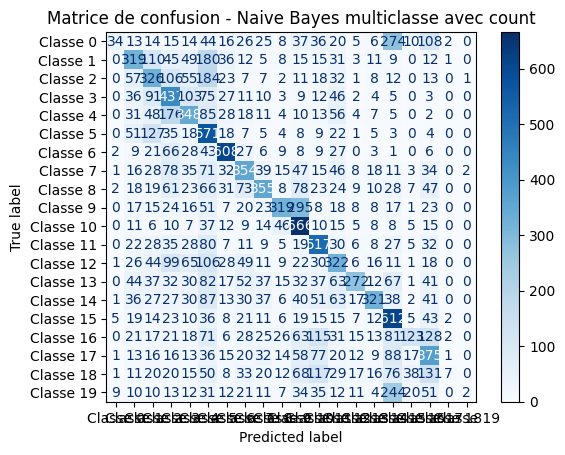

In [125]:
# ======================================================
# Classification multiclasse avec Frequence avec Naive Bayes - Version 3
# ======================================================

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()

y_train_multi = df_train['target'].values
y_test_multi = df_test['target'].values

# Vectorisation avec Bag-of-Words mode count (sparse)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Initialisation du classifieur binaire et du classifieur multi-classe
cl_bin = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)
nb_classifier_multi = classif.ClassifierMultiOAA(cl_bin)

# Entraînement
start = time.time()
nb_classifier_multi.train(X_train_sparse, y_train_multi)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier_multi.predict(X_train_sparse)
y_test_pred = nb_classifier_multi.predict(X_test_sparse)

# Calcul des précisions
train_acc = (y_train_pred == y_train_multi).mean()
test_acc = (y_test_pred == y_test_multi).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement multiclasse
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier_multi, (X_train_sparse, y_train_multi), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
classes_uniques = np.unique(y_test_multi)
cm = confusion_matrix(y_test_multi, y_test_pred, labels=classes_uniques)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {c}" for c in classes_uniques])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes multiclasse avec count")
plt.show()


Temps d'entraînement: 0.005766153335571289 secondes
Accuracy finale (train): 0.9183006535947712
Accuracy finale (test): 0.49284425736620563
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0520
Itération 1: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0520
Itération 2: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0518
Itération 3: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0518
Itération 4: taille base app.= 1476	taille base test=360	Taux de bonne classif: 0.0519
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.052021604938271605), np.float64(0.051959876543209875), np.float64(0.05184413580246913), np.float64(0.05183641975308642), np.float64(0.05189814814814815)]
Taux moyen de bonne classification : 0.0519
Écart-type : 0.0001


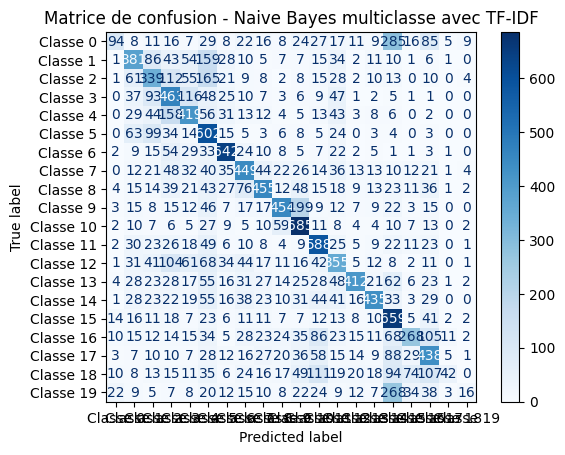

In [126]:
# ======================================================
# Classification multiclasse avec TF-IDF avec Naive Bayes - Version 4
# ======================================================

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()

y_train_multi = df_train['target'].values
y_test_multi = df_test['target'].values

# Vectorisation TF-IDF manuelle (avec la fonction fournie)
X_train_tfidf, vocab_index = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_tfidf, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

# Initialisation du classifieur binaire et du classifieur multi-classe
cl_bin = classif.ClassifierNaiveBayesMultinomialBinary(input_dimension=len(index_mots), alpha=1.0)
nb_classifier_multi = classif.ClassifierMultiOAA(cl_bin)

# Entraînement
start = time.time()
nb_classifier_multi.train(X_train_tfidf, y_train_multi)
end = time.time()
print("Temps d'entraînement:", end - start, "secondes")

# Prédictions
y_train_pred = nb_classifier_multi.predict(X_train_tfidf)
y_test_pred = nb_classifier_multi.predict(X_test_tfidf)

# Calcul des précisions
train_acc = (y_train_pred == y_train_multi).mean()
test_acc = (y_test_pred == y_test_multi).mean()
print("Accuracy finale (train):", train_acc)
print("Accuracy finale (test):", test_acc)

# Validation croisée 5 folds sur l’ensemble d'entraînement multiclasse
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(nb_classifier_multi, (X_train_tfidf, y_train_multi), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# Visualisation de la matrice de confusion
classes_uniques = np.unique(y_test_multi)
cm = confusion_matrix(y_test_multi, y_test_pred, labels=classes_uniques)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {c}" for c in classes_uniques])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Naive Bayes multiclasse avec TF-IDF")
plt.show()


# Classifier Arbre de decision

Temps d'entraînement (Arbre de Décision - sklearn) : 0.016485214233398438 secondes
Accuracy entraînement : 0.9942
Accuracy test         : 0.7838
Taux de bonne classification par fold : [0.68571429 0.85714286 0.68571429 0.76470588 0.67647059]
Taux moyen de bonne classification : 0.7339
Écart-type : 0.0694


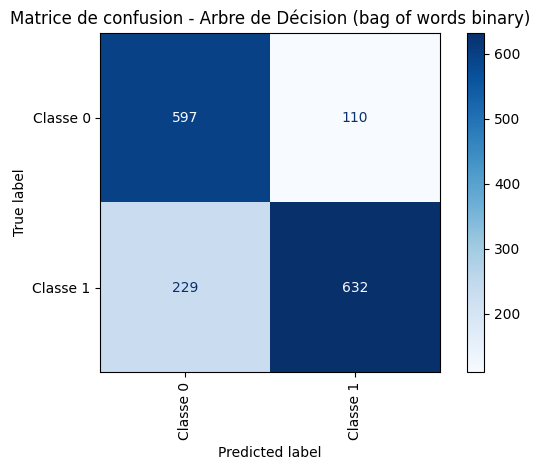

In [127]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec Arbre de decision - Version 1
# ======================================================

# ---------------------------
# Paramètres
# ---------------------------
classe1 = 0
classe2 = 1

# Réduction de la taille pour accélérer les tests
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Préparation des données
df_binaire['target_bin'] = df_binaire['target']
df_test_bin['target_bin'] = df_test_bin['target']

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Utilisation de Scikit-learn pour l'arbre de décision
# ---------------------------
arbre_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3000, random_state=0)

# Entraînement
start = time.time()
arbre_classifier.fit(X_train, y_train_bin)
end = time.time()
print("Temps d'entraînement (Arbre de Décision - sklearn) :", end - start, "secondes")

# Prédictions
y_train_pred = arbre_classifier.predict(X_train)
y_test_pred = arbre_classifier.predict(X_test)

# Évaluation
acc_train = accuracy_score(y_train_bin, y_train_pred)
acc_test = accuracy_score(y_test_bin, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Validation croisée avec scoring accuracy
scores = cross_val_score(arbre_classifier, X_train, y_train_bin, cv=5, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[classe1, classe2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (bag of words binary)")
plt.grid(False)
plt.tight_layout()
plt.show()


Temps d'entraînement (Arbre de Décision - sklearn) : 0.013701915740966797 secondes
Accuracy entraînement : 0.9942
Accuracy test         : 0.7838
Taux de bonne classification par fold : [0.68571429 0.85714286 0.71428571 0.76470588 0.67647059]
Taux moyen de bonne classification : 0.7397
Écart-type : 0.0663


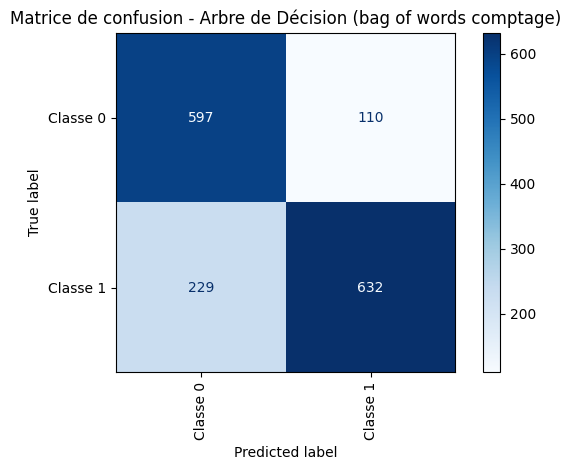

In [128]:
# ======================================================
# Classification binaire avec Bag-of-Words (Comptage) avec Arbre de decision - Version 2
# ======================================================

# ---------------------------
# Paramètres
# ---------------------------
classe1 = 0
classe2 = 1

# Réduction de la taille pour accélérer les tests
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Préparation des données
df_binaire['target_bin'] = df_binaire['target']
df_test_bin['target_bin'] = df_test_bin['target']

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Utilisation de Scikit-learn pour l'arbre de décision
# ---------------------------
arbre_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3000, random_state=0)

# Entraînement
start = time.time()
arbre_classifier.fit(X_train, y_train_bin)
end = time.time()
print("Temps d'entraînement (Arbre de Décision - sklearn) :", end - start, "secondes")

# Prédictions
y_train_pred = arbre_classifier.predict(X_train)
y_test_pred = arbre_classifier.predict(X_test)

# Évaluation
acc_train = accuracy_score(y_train_bin, y_train_pred)
acc_test = accuracy_score(y_test_bin, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Validation croisée avec scoring accuracy
scores = cross_val_score(arbre_classifier, X_train, y_train_bin, cv=5, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[classe1, classe2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (bag of words comptage)")
plt.grid(False)
plt.tight_layout()
plt.show()


Temps d'entraînement (Arbre de Décision - sklearn) : 0.014307022094726562 secondes
Accuracy entraînement : 0.9942
Accuracy test         : 0.7640
Taux de bonne classification par fold : [0.77142857 0.74285714 0.65714286 0.70588235 0.64705882]
Taux moyen de bonne classification : 0.7049
Écart-type : 0.0479


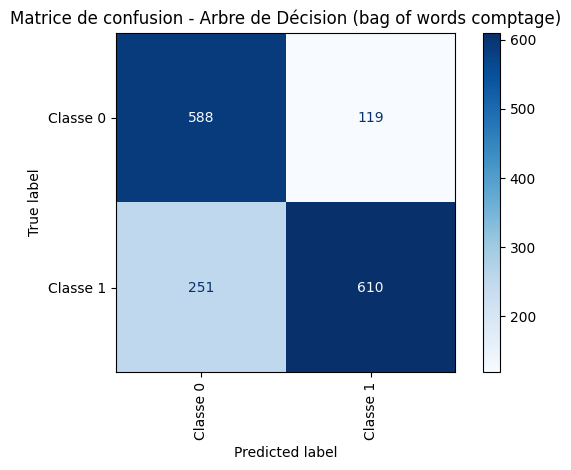

In [129]:
# ======================================================
# Classification binaire avec Bag-of-Words (Frequence) avec Arbre de decision - Version 3
# ======================================================

# ---------------------------
# Paramètres
# ---------------------------
classe1 = 0
classe2 = 1

# Réduction de la taille pour accélérer les tests
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Préparation des données
df_binaire['target_bin'] = df_binaire['target']
df_test_bin['target_bin'] = df_test_bin['target']

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Utilisation de Scikit-learn pour l'arbre de décision
# ---------------------------
arbre_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3000, random_state=0)

# Entraînement
start = time.time()
arbre_classifier.fit(X_train, y_train_bin)
end = time.time()
print("Temps d'entraînement (Arbre de Décision - sklearn) :", end - start, "secondes")

# Prédictions
y_train_pred = arbre_classifier.predict(X_train)
y_test_pred = arbre_classifier.predict(X_test)

# Évaluation
acc_train = accuracy_score(y_train_bin, y_train_pred)
acc_test = accuracy_score(y_test_bin, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Validation croisée avec scoring accuracy
scores = cross_val_score(arbre_classifier, X_train, y_train_bin, cv=5, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[classe1, classe2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (bag of words comptage)")
plt.grid(False)
plt.tight_layout()
plt.show()


Temps d'entraînement (Arbre de Décision - TF-IDF) : 0.016049861907958984 secondes
Accuracy entraînement : 0.9942
Accuracy test         : 0.7615
Taux de bonne classification par fold : [0.77142857 0.74285714 0.57142857 0.73529412 0.61764706]
Taux moyen de bonne classification : 0.6877
Écart-type : 0.0784


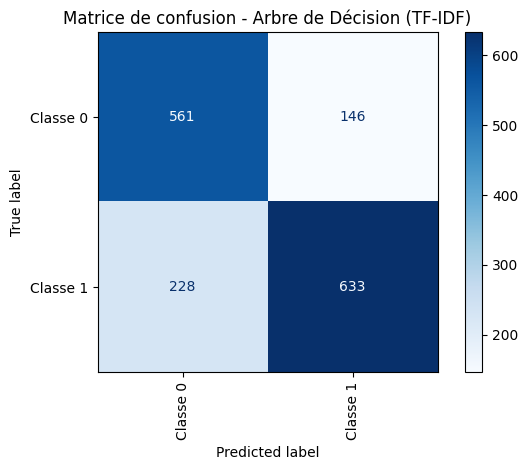

In [130]:
# ======================================================
# Classification binaire avec Bag-of-Words (tf-idf) avec Arbre de decision - Version 4
# ======================================================

# ---------------------------
# Paramètres
# ---------------------------
classe1 = 0
classe2 = 1

# Réduction de la taille pour accélérer les tests (optionnel)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Labels
df_binaire['target_bin'] = df_binaire['target']
df_test_bin['target_bin'] = df_test_bin['target']

y_train_bin = df_binaire['target_bin'].values
y_test_bin = df_test_bin['target_bin'].values
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# ---------------------------
# TF-IDF Vectorisation (manuelle)
# ---------------------------
X_train_sparse, vocab_index = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Arbre de Décision (scikit-learn)
# ---------------------------
arbre_classifier = DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=3000,
    class_weight="balanced",
    random_state=0
)

# Entraînement
start = time.time()
arbre_classifier.fit(X_train, y_train_bin)
end = time.time()
print("Temps d'entraînement (Arbre de Décision - TF-IDF) :", end - start, "secondes")

# Prédictions
y_train_pred = arbre_classifier.predict(X_train)
y_test_pred = arbre_classifier.predict(X_test)

# Évaluation
acc_train = accuracy_score(y_train_bin, y_train_pred)
acc_test = accuracy_score(y_test_bin, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Validation croisée avec scoring accuracy
scores = cross_val_score(arbre_classifier, X_train, y_train_bin, cv=5, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[classe1, classe2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Classe {classe1}", f"Classe {classe2}"])
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (TF-IDF)")
plt.grid(False)
plt.tight_layout()
plt.show()


Temps d'entraînement (multi-classe - arbre de décision) : 1.058288335800171 secondes
Accuracy entraînement : 0.9891
Accuracy test         : 0.2162


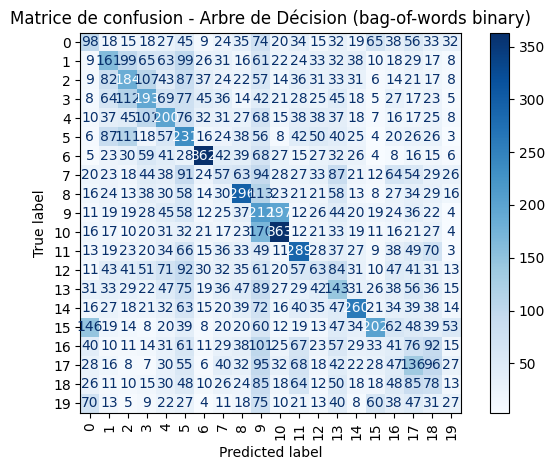

Taux de bonne classification par fold : [0.20652174 0.1852861  0.21253406 0.20435967 0.20980926]
Taux moyen de bonne classification : 0.2037
Écart-type : 0.0096


In [131]:
# ==========================================================
# Classification multi-classe avec Arbre de Décision (Bag-of-Words binary) - Version 1
# ==========================================================

# ---------------------------
# Paramètres
# ---------------------------
mode_vectorisation = "binary"  # "binary", "count", "freq", "tfidf"
max_depth = 3000                 # profondeur maximale de l’arbre
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle
# ---------------------------

# Initialisation du classifieur sklearn
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)

# Chronométrage
start = time.time()
tree_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe - arbre de décision) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (bag-of-words binary)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sklearn)
# ---------------------------

cv = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=0)
scores = cross_val_score(tree_classifier, X_train, y_train_multi, cv=cv, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")


Temps d'entraînement (multi-classe - arbre de décision) : 1.03580904006958 secondes
Accuracy entraînement : 0.9891
Accuracy test         : 0.2191


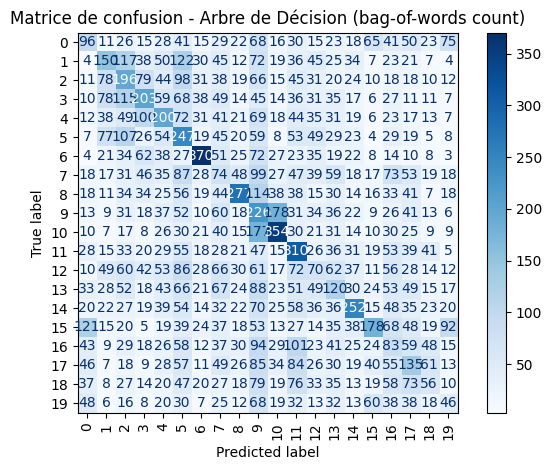

Taux de bonne classification par fold : [0.20380435 0.1880109  0.22343324 0.22615804 0.23705722]
Taux moyen de bonne classification : 0.2157
Écart-type : 0.0175


In [132]:
# ==========================================================
# Classification multi-classe avec Arbre de Décision (Bag-of-Words comptage) - Version 2
# ==========================================================

# ---------------------------
# Paramètres
# ---------------------------
mode_vectorisation = "count"  # "binary", "count", "freq", "tfidf"
max_depth = 3000                 # profondeur maximale de l’arbre
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle
# ---------------------------

# Initialisation du classifieur sklearn
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)

# Chronométrage
start = time.time()
tree_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe - arbre de décision) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (bag-of-words count)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sklearn)
# ---------------------------

cv = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=0)
scores = cross_val_score(tree_classifier, X_train, y_train_multi, cv=cv, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")


Temps d'entraînement (multi-classe - arbre de décision) : 1.2291460037231445 secondes
Accuracy entraînement : 0.9891
Accuracy test         : 0.2162


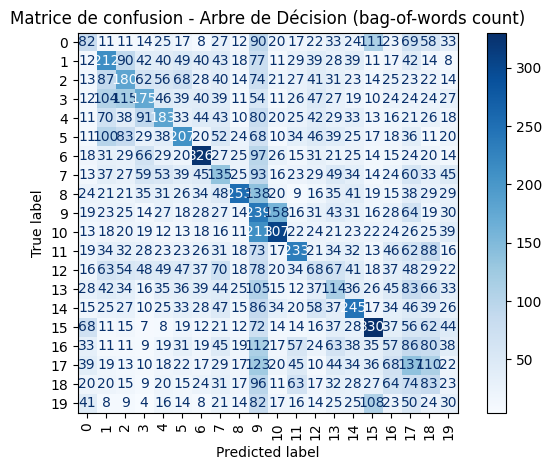

Taux de bonne classification par fold : [0.20652174 0.19618529 0.19618529 0.22070845 0.22615804]
Taux moyen de bonne classification : 0.2092
Écart-type : 0.0124


In [133]:
# ==========================================================
# Classification multi-classe avec Arbre de Décision (Bag-of-Words frequence) - Version 3
# ==========================================================

# ---------------------------
# Paramètres
# ---------------------------
mode_vectorisation = "freq"  # "binary", "count", "freq", "tfidf"
max_depth = 3000                 # profondeur maximale de l’arbre
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle
# ---------------------------

# Initialisation du classifieur sklearn
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)

# Chronométrage
start = time.time()
tree_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe - arbre de décision) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (bag-of-words count)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sklearn)
# ---------------------------

cv = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=0)
scores = cross_val_score(tree_classifier, X_train, y_train_multi, cv=cv, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")


Temps d'entraînement (multi-classe - arbre de décision) : 1.1658222675323486 secondes
Accuracy entraînement : 0.9891
Accuracy test         : 0.2163


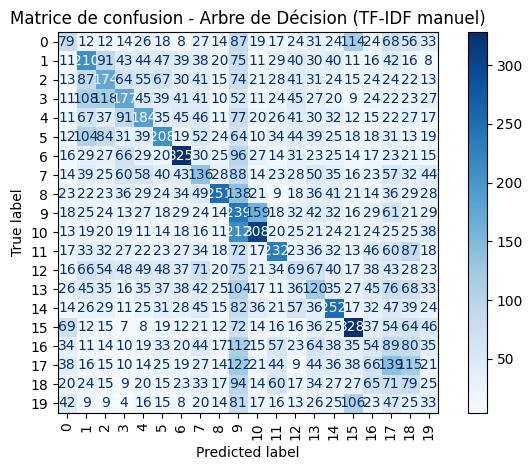

Taux de bonne classification par fold : [0.20652174 0.19618529 0.19618529 0.22070845 0.22615804]
Taux moyen de bonne classification : 0.2092
Écart-type : 0.0124


In [134]:
# ==========================================================
# Classification multi-classe avec Arbre de Décision (TF-IDF avec bag_of_words_tfidf_manual) - Version 4
# ==========================================================

# ---------------------------
# Paramètres
# ---------------------------
max_depth = 3000
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation avec ta fonction TF-IDF
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle
# ---------------------------

tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)

start = time.time()
tree_classifier.fit(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe - arbre de décision) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = tree_classifier.predict(X_train)
y_test_pred = tree_classifier.predict(X_test)

# ---------------------------
# Évaluation des performances
# ---------------------------

acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Arbre de Décision (TF-IDF manuel)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sklearn)
# ---------------------------

cv = StratifiedKFold(n_splits=nb_folds, shuffle=True, random_state=0)
scores = cross_val_score(tree_classifier, X_train, y_train_multi, cv=cv, scoring='accuracy')

print(f"Taux de bonne classification par fold : {scores}")
print(f"Taux moyen de bonne classification : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")

### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


# Clustering hiérarchique

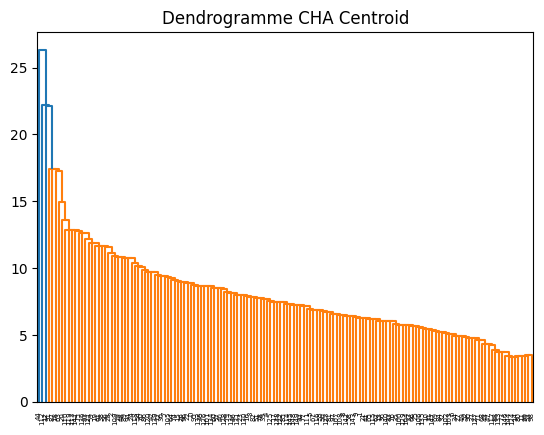

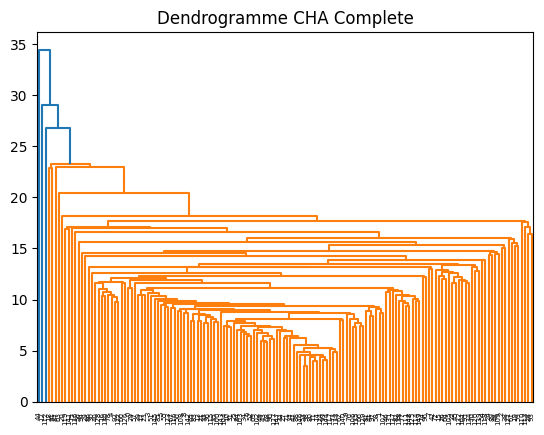

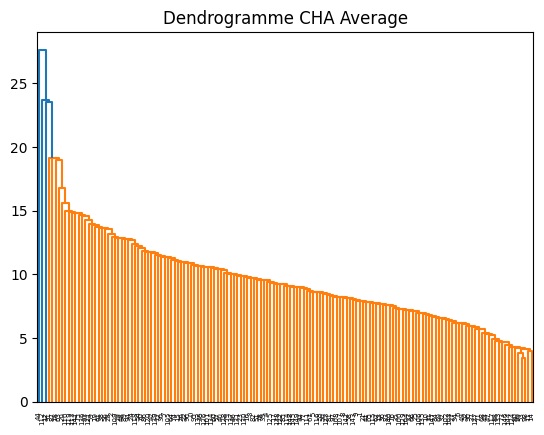

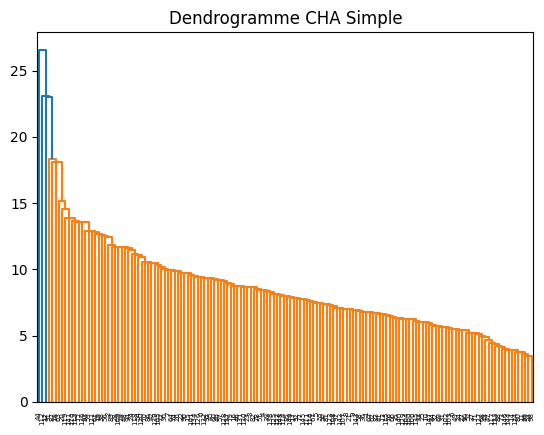

[[53, 98, np.float64(3.4641016151377544), 2],
 [99, 150, np.float64(3.4641016151377544), 3],
 [11, 151, np.float64(3.605551275463989), 4],
 [80, 152, np.float64(3.7416573867739413), 5],
 [124, 153, np.float64(3.7416573867739413), 6],
 [14, 154, np.float64(3.872983346207417), 7],
 [144, 155, np.float64(3.872983346207417), 8],
 [146, 156, np.float64(3.872983346207417), 9],
 [73, 157, np.float64(4.0), 10],
 [88, 158, np.float64(4.123105625617661), 11],
 [133, 159, np.float64(4.242640687119285), 12],
 [117, 160, np.float64(4.358898943540674), 13],
 [47, 161, np.float64(4.47213595499958), 14],
 [43, 162, np.float64(4.69041575982343), 15],
 [68, 163, np.float64(4.898979485566356), 16],
 [127, 164, np.float64(5.0), 17],
 [71, 165, np.float64(5.0990195135927845), 18],
 [37, 166, np.float64(5.196152422706632), 19],
 [52, 167, np.float64(5.196152422706632), 20],
 [90, 168, np.float64(5.196152422706632), 21],
 [27, 169, np.float64(5.385164807134504), 22],
 [34, 170, np.float64(5.385164807134504),

In [135]:
# Sélectionner les N premiers échantillons (par exemple 150)
N = 150
texts = newsgroups_df_neitoie['messages'][:N]  # Prendre les 150 premiers messages

# Représentation par sac de mots (binary=True indique la présence/absence des mots)
vectorizer = CountVectorizer(binary=True)
X_small = vectorizer.fit_transform(texts).toarray()  # Générer une matrice binaire de fréquence des mots

X_small_df = pd.DataFrame(X_small)  # Convertir au format DataFrame

# Appel de l'algorithme de clustering hiérarchique CHA (avec différentes méthodes de liaison)
clust.CHA(X_small_df, linkage='centroid', verbose=False, dendrogramme=True)  # Liaison par centroïde
clust.CHA(X_small_df, linkage='complete', verbose=False, dendrogramme=True)  # Liaison complète
clust.CHA(X_small_df, linkage='average', verbose=False, dendrogramme=True)  # Liaison moyenne
clust.CHA(X_small_df, linkage='simple', verbose=False, dendrogramme=True)  # Liaison simple

# k-moyennes

In [136]:
# Prendre tous les textes
texts = newsgroups_df_neitoie['messages']

# Ne pas limiter la taille du vocabulaire (peut avoir beaucoup de dimensions)
vectorizer = CountVectorizer(binary=True)
X_sparse = vectorizer.fit_transform(texts)  # Le résultat est une matrice creuse

# Ici, il faut absolument convertir en dense pour faire l'ACP
X_dense = X_sparse.toarray()

# ACP pour réduire à deux dimensions
X_pca = PCA(n_components=2).fit_transform(X_dense)

# Convertir en DataFrame pour la visualisation
X_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

Iteration 1 Inertie : 46403.0196 Difference: 46402.0195
Iteration 2 Inertie : 39415.0931 Difference: 6987.9265
Iteration 3 Inertie : 35396.8007 Difference: 4018.2924
Iteration 4 Inertie : 32709.2515 Difference: 2687.5492
Iteration 5 Inertie : 30796.1320 Difference: 1913.1195
Iteration 6 Inertie : 29434.1439 Difference: 1361.9881
Iteration 7 Inertie : 28252.3214 Difference: 1181.8225
Iteration 8 Inertie : 27136.2536 Difference: 1116.0679
Iteration 9 Inertie : 26075.2361 Difference: 1061.0174
Iteration 10 Inertie : 25061.4848 Difference: 1013.7513
Iteration 11 Inertie : 24212.7577 Difference: 848.7271
Iteration 12 Inertie : 23615.9200 Difference: 596.8377
Iteration 13 Inertie : 23094.4398 Difference: 521.4802
Iteration 14 Inertie : 22589.7039 Difference: 504.7359
Iteration 15 Inertie : 22034.8734 Difference: 554.8305
Iteration 16 Inertie : 21549.7585 Difference: 485.1149
Iteration 17 Inertie : 21180.6042 Difference: 369.1543
Iteration 18 Inertie : 20858.2281 Difference: 322.3761
Iteratio

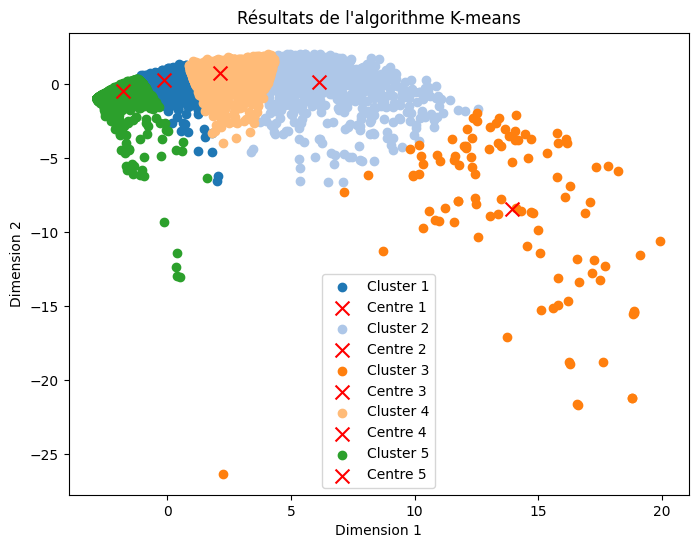

In [137]:
# Définition des paramètres
K = 5            # Nombre de clusters
epsilon = 1e-4   # Seuil de convergence
iter_max = 50    # Nombre maximum d'itérations

# Exécution de l’algorithme k-means
centroids, affectation = clust.kmoyennes(K, X_df, epsilon, iter_max)
clust.affiche_resultat(X_df, centroids, affectation)

In [138]:
# Restaurer l'identifiant de cluster pour chaque échantillon sous forme de tableau
labels = np.zeros(len(X_df))
for cluster_id, indices in affectation.items():
    labels[indices] = cluster_id

# Calcul du score de silhouette
score = silhouette_score(X_df.values, labels)
print(f"Score de silhouette : {score:.4f}")

Score de silhouette : 0.4846


In [139]:
X_np = X_df.to_numpy()
labels = labels.astype(int)
xb = ev.xie_beni_index_manual(X_np, labels, centroids)
dunn = ev.dunn_index_manual(X_np, labels)

print(f"Xie-Beni Index (manual): {xb:.4f}")
print(f"Dunn Index (manual): {dunn:.4f}")

Xie-Beni Index (manual): 0.3101
Dunn Index (manual): 0.0001


In [140]:
y_true = newsgroups_df_neitoie['target'].values
labels_small = labels         # labels doit déjà contenir 1000 éléments

# Comparaison
ari = adjusted_rand_score(y_true, labels_small)
nmi = normalized_mutual_info_score(y_true, labels_small)

print(f"Indice de Rand Ajusté (ARI) : {ari:.4f}")
print(f"Information Mutuelle Normalisée (NMI) : {nmi:.4f}")

Indice de Rand Ajusté (ARI) : 0.0064
Information Mutuelle Normalisée (NMI) : 0.0242


Iteration 1 Inertie : 55577.3123 Difference: 55576.3122
Iteration 2 Inertie : 43883.8869 Difference: 11693.4253
Iteration 3 Inertie : 37393.1439 Difference: 6490.7431
Iteration 4 Inertie : 33005.3924 Difference: 4387.7514
Iteration 5 Inertie : 28830.9562 Difference: 4174.4362
Iteration 6 Inertie : 20159.4831 Difference: 8671.4731
Iteration 7 Inertie : 15741.6647 Difference: 4417.8184
Iteration 8 Inertie : 14822.3822 Difference: 919.2825
Iteration 9 Inertie : 14283.3197 Difference: 539.0625
Iteration 10 Inertie : 13835.0995 Difference: 448.2202
Iteration 11 Inertie : 13470.6912 Difference: 364.4083
Iteration 12 Inertie : 13150.6046 Difference: 320.0866
Iteration 13 Inertie : 12901.8988 Difference: 248.7058
Iteration 14 Inertie : 12705.3962 Difference: 196.5025
Iteration 15 Inertie : 12526.0723 Difference: 179.3240
Iteration 16 Inertie : 12372.7408 Difference: 153.3314
Iteration 17 Inertie : 12234.2950 Difference: 138.4459
Iteration 18 Inertie : 12101.3767 Difference: 132.9183
Iteration 

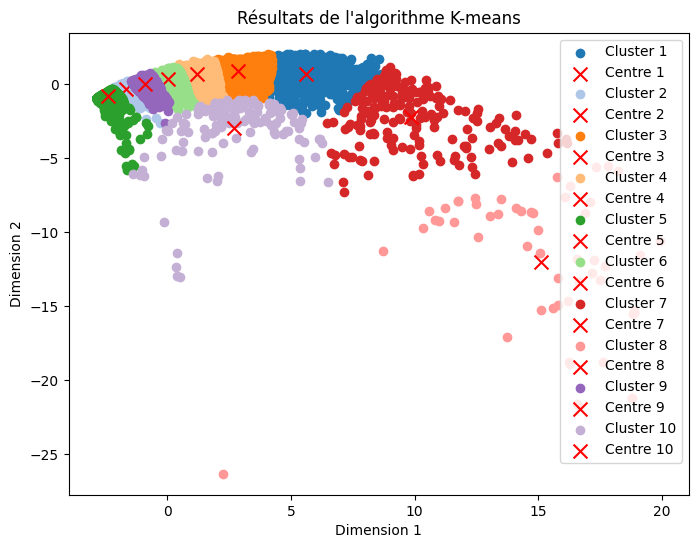

In [141]:
# Définition des paramètres
K = 10            # Nombre de clusters
epsilon = 1e-4   # Seuil de convergence
iter_max = 50    # Nombre maximum d'itérations

# Exécution de l’algorithme k-means
centroids, affectation = clust.kmoyennes(K, X_df, epsilon, iter_max)
clust.affiche_resultat(X_df, centroids, affectation)

In [142]:
# Restaurer l'identifiant de cluster pour chaque échantillon sous forme de tableau
labels = np.zeros(len(X_df))
for cluster_id, indices in affectation.items():
    labels[indices] = cluster_id

# Calcul du score de silhouette
score = silhouette_score(X_df.values, labels)
print(f"Score de silhouette : {score:.4f}")

Score de silhouette : 0.4010


In [143]:
X_np = X_df.to_numpy()
labels = labels.astype(int)
xb = ev.xie_beni_index_manual(X_np, labels, centroids)
dunn = ev.dunn_index_manual(X_np, labels)

print(f"Xie-Beni Index (manual): {xb:.4f}")
print(f"Dunn Index (manual): {dunn:.4f}")

Xie-Beni Index (manual): 0.7242
Dunn Index (manual): 0.0000


In [144]:
y_true = newsgroups_df_neitoie['target'].values
labels_small = labels         # labels doit déjà contenir 1000 éléments

# Comparaison
ari = adjusted_rand_score(y_true, labels_small)
nmi = normalized_mutual_info_score(y_true, labels_small)

print(f"Indice de Rand Ajusté (ARI) : {ari:.4f}")
print(f"Information Mutuelle Normalisée (NMI) : {nmi:.4f}")

Indice de Rand Ajusté (ARI) : 0.0065
Information Mutuelle Normalisée (NMI) : 0.0272


Iteration 1 Inertie : 27268.6384 Difference: 27267.6383
Iteration 2 Inertie : 15995.3680 Difference: 11273.2704
Iteration 3 Inertie : 12129.4853 Difference: 3865.8827
Iteration 4 Inertie : 10412.0267 Difference: 1717.4586
Iteration 5 Inertie : 9309.5711 Difference: 1102.4556
Iteration 6 Inertie : 8709.7739 Difference: 599.7972
Iteration 7 Inertie : 8370.7626 Difference: 339.0113
Iteration 8 Inertie : 8121.1686 Difference: 249.5939
Iteration 9 Inertie : 7883.7018 Difference: 237.4669
Iteration 10 Inertie : 7679.6191 Difference: 204.0827
Iteration 11 Inertie : 7529.8441 Difference: 149.7750
Iteration 12 Inertie : 7412.1114 Difference: 117.7326
Iteration 13 Inertie : 7259.3056 Difference: 152.8058
Iteration 14 Inertie : 7163.7822 Difference: 95.5234
Iteration 15 Inertie : 7079.1300 Difference: 84.6522
Iteration 16 Inertie : 6971.2163 Difference: 107.9137
Iteration 17 Inertie : 6874.1317 Difference: 97.0846
Iteration 18 Inertie : 6788.2702 Difference: 85.8614
Iteration 19 Inertie : 6723.60

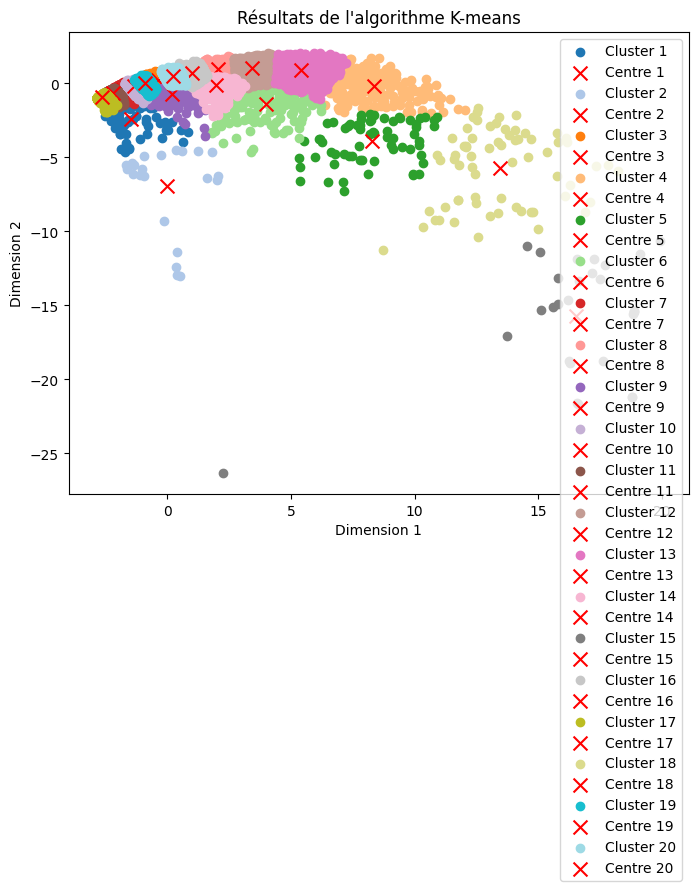

In [145]:
# Définition des paramètres
K = 20           # Nombre de clusters
epsilon = 1e-4   # Seuil de convergence
iter_max = 50    # Nombre maximum d'itérations

# Exécution de l’algorithme k-means
centroids, affectation = clust.kmoyennes(K, X_df, epsilon, iter_max)
clust.affiche_resultat(X_df, centroids, affectation)

In [146]:
# Restaurer l'identifiant de cluster pour chaque échantillon sous forme de tableau
labels = np.zeros(len(X_df))
for cluster_id, indices in affectation.items():
    labels[indices] = cluster_id

# Calcul du score de silhouette
score = silhouette_score(X_df.values, labels)
print(f"Score de silhouette : {score:.4f}")

Score de silhouette : 0.3523


In [147]:
X_np = X_df.to_numpy()
labels = labels.astype(int)
xb = ev.xie_beni_index_manual(X_np, labels, centroids)
dunn = ev.dunn_index_manual(X_np, labels)

print(f"Xie-Beni Index (manual): {xb:.4f}")
print(f"Dunn Index (manual): {dunn:.4f}")

Xie-Beni Index (manual): 1.2682
Dunn Index (manual): 0.0001


In [148]:
y_true = newsgroups_df_neitoie['target'].values
labels_small = labels         # labels doit déjà contenir 1000 éléments

# Comparaison
ari = adjusted_rand_score(y_true, labels_small)
nmi = normalized_mutual_info_score(y_true, labels_small)

print(f"Indice de Rand Ajusté (ARI) : {ari:.4f}")
print(f"Information Mutuelle Normalisée (NMI) : {nmi:.4f}")

Indice de Rand Ajusté (ARI) : 0.0063
Information Mutuelle Normalisée (NMI) : 0.0342


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
